In [1]:
import pandas as pd
import numpy as np
import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix

In [2]:
# uncomment this to have an interactive plots
#%matplotlib inline  
#%matplotlib notebook
#%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [4]:
MS_Phospho = pd.read_excel("Evosep_Phospho (STY)Sites.xlsx",index_col=0)
MS_Phospho_filtered = MS_Phospho.loc[MS_Phospho['Localization prob'] > 0.75]

MS_Phospho_filtered

,Proteins,Positions within proteins,Leading proteins,Protein,Protein names,Gene names,Fasta headers,Localization prob,Score diff,PEP,...,Best localization raw file,Best localization scan number,Best score evidence ID,Best score MS/MS ID,Best score raw file,Best score scan number,Best PEP evidence ID,Best PEP MS/MS ID,Best PEP raw file,Best PEP scan number
Merge_ID,,,,,,,,,,,,,,,,,,,,,
A0A1B0GTU1;O75152 psite 759;758,A0A1B0GTU1;O75152,759;758,A0A1B0GTU1;O75152,O75152,Zinc finger CCCH domain-containing protein 11A,ZC3H11A,sp|A0A1B0GTU1|ZC11B_HUMAN Zinc finger CCCH dom...,0.970828,16.28700,7.053300e-10,...,210525kw_BorisPhosEvo44_B5_1_S1-A9_1_5396,12480,384396,218979,210525kw_BorisPhosEvo44_B1_2_S1-A2_1_5389,12257,384395,218978,210525kw_BorisPhosEvo44_B1_1_S1-A1_1_5388,12006
A0A1B0GTU1;O75152 psite 760;759,A0A1B0GTU1;O75152,760;759,A0A1B0GTU1;O75152,O75152,Zinc finger CCCH domain-containing protein 11A,ZC3H11A,sp|A0A1B0GTU1|ZC11B_HUMAN Zinc finger CCCH dom...,0.776353,6.35765,6.106310e-07,...,210525kw_BorisPhosEvo44_A5_1_S2-A9_1_5460,7186,384386,218969,210525kw_BorisPhosEvo44_B13_1_S1-C1_1_5412,11920,384375,218958,210525kw_BorisPhosEvo44_A5_1_S2-A9_1_5460,7186
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 730;758;779;165,A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5,730;758;779;165,A0FGR8-2,A0FGR8-2,Extended synaptotagmin-2,ESYT2,sp|A0FGR8-2|ESYT2_HUMAN Isoform 2 of Extended ...,0.973730,16.83660,3.983380e-05,...,210525kw_BorisPhosEvo44_B5_2_S1-A10_1_5397,13001,106881,61389,210525kw_BorisPhosEvo44_B1_2_S1-A2_1_5389,12763,106884,61392,210525kw_BorisPhosEvo44_B6_1_S1-A11_1_5398,12769
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 733;761;782;168,A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5,733;761;782;168,A0FGR8-2,A0FGR8-2,Extended synaptotagmin-2,ESYT2,sp|A0FGR8-2|ESYT2_HUMAN Isoform 2 of Extended ...,0.997861,28.68920,3.983380e-05,...,210525kw_BorisPhosEvo44_A16_2_S2-C8_1_5453,10600,106881,61389,210525kw_BorisPhosEvo44_B1_2_S1-A2_1_5389,12763,106884,61392,210525kw_BorisPhosEvo44_B6_1_S1-A11_1_5398,12769
A0JLT2 psite 226,A0JLT2,226,A0JLT2,A0JLT2,Mediator of RNA polymerase II transcription su...,MED19,sp|A0JLT2|MED19_HUMAN Mediator of RNA polymera...,0.999994,52.69700,5.972650e-15,...,210525kw_BorisPhosEvo44_A15_1_S2-C5_1_5450,9586,327432,187370,210525kw_BorisPhosEvo44_A17_2_S2-C10_1_5455,10878,327432,187370,210525kw_BorisPhosEvo44_A17_2_S2-C10_1_5455,10878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9UGU5 psite 462,Q9UGU5,462,Q9UGU5,Q9UGU5,HMG domain-containing protein 4,HMGXB4,sp|Q9UGU5|HMGX4_HUMAN HMG domain-containing pr...,0.999976,43.26290,5.057530e-02,...,210525kw_BorisPhosEvo44_B14_2_S1-C4_1_5415,10370,38962,22570,210525kw_BorisPhosEvo44_B14_2_S1-C4_1_5415,10370,38962,22570,210525kw_BorisPhosEvo44_B14_2_S1-C4_1_5415,10370
Q9ULT8 psite 1872,Q9ULT8,1872,Q9ULT8,Q9ULT8,E3 ubiquitin-protein ligase HECTD1,HECTD1,sp|Q9ULT8|HECD1_HUMAN E3 ubiquitin-protein lig...,0.808740,4.97426,3.487830e-02,...,210525kw_BorisPhosEvo44_B7_2_S1-B2_1_5401,10030,202481,115089,210525kw_BorisPhosEvo44_B7_2_S1-B2_1_5401,10030,202481,115089,210525kw_BorisPhosEvo44_B7_2_S1-B2_1_5401,10030
Q9UMS6;Q9UMS6-3;Q9UMS6-5;Q9UMS6-4;Q9UMS6-2 psite 735;735;340;704;735,Q9UMS6;Q9UMS6-3;Q9UMS6-5;Q9UMS6-4;Q9UMS6-2,735;735;340;704;735,Q9UMS6;Q9UMS6-4,Q9UMS6-4,Synaptopodin-2,SYNPO2,sp|Q9UMS6|SYNP2_HUMAN Synaptopodin-2 OS=Homo s...,0.754603,7.90587,2.492920e-24,...,210525kw_BorisPhosEvo44_A6_2_S2-A12_1_5433,15018,372796,212335,210525kw_BorisPhosEvo44_A12_2_S2-B12_1_5445,14863,372833,212372,210525kw_BorisPhosEvo44_B1_1_S1-A1_1_5388,18494


In [5]:
# reading legend
MS_legend = pd.read_excel('Codes.xlsx',index_col=0)
MS_legend

,Treatment,Timepoint,Replicate
ID,,,
1,nt,0,1
2,nt,10',1
3,nt,45',1
4,Trametinib,45',1
5,Gefitinib,45',1
6,Tram+Gef,45',1
7,nt,0,2
8,nt,10',2
9,nt,45',2


In [6]:
# preparing samples legend

numbers_all_ctrls = MS_legend.loc[MS_legend['Treatment'] == 'nt'].index
str_all_ctrls = ''
for number in numbers_all_ctrls:
    str_all_ctrls = str_all_ctrls + str(number) + '|'
str_all_ctrls = str_all_ctrls[:-1]

numbers_0_ctrls = MS_legend.loc[(MS_legend['Treatment'] == 'nt') & (MS_legend['Timepoint'] == 0)].index
str_0_ctrls = ''
for number in numbers_0_ctrls:
    str_0_ctrls = str_0_ctrls + str(number) + '|'
str_0_ctrls = str_0_ctrls[:-1]

numbers_10_ctrls = MS_legend.loc[(MS_legend['Treatment'] == 'nt') & (MS_legend['Timepoint'] == "10'")].index
str_10_ctrls = ''
for number in numbers_10_ctrls:
    str_10_ctrls = str_10_ctrls + str(number) + '|'
str_10_ctrls = str_10_ctrls[:-1]

numbers_45_ctrls = MS_legend.loc[(MS_legend['Treatment'] == 'nt') & (MS_legend['Timepoint'] == "45'")].index
str_45_ctrls = ''
for number in numbers_45_ctrls:
    str_45_ctrls = str_45_ctrls + str(number) + '|'
str_45_ctrls = str_45_ctrls[:-1]

numbers_45_Tram = MS_legend.loc[(MS_legend['Treatment'] == 'Trametinib') & (MS_legend['Timepoint'] == "45'")].index
str_45_Tram = ''
for number in numbers_45_Tram:
    str_45_Tram = str_45_Tram + str(number) + '|'
str_45_Tram = str_45_Tram[:-1]

numbers_45_Gef = MS_legend.loc[(MS_legend['Treatment'] == 'Gefitinib') & (MS_legend['Timepoint'] == "45'")].index
str_45_Gef = ''
for number in numbers_45_Gef:
    str_45_Gef = str_45_Gef + str(number) + '|'
str_45_Gef = str_45_Gef[:-1]

numbers_45_Comb = MS_legend.loc[(MS_legend['Treatment'] == 'Tram+Gef') & (MS_legend['Timepoint'] == "45'")].index
str_45_Comb = ''
for number in numbers_45_Comb:
    str_45_Comb = str_45_Comb + str(number) + '|'
str_45_Comb = str_45_Comb[:-1]


In [7]:
# just as example
# this is how we pick 0 time point samples both with A and with B 
MS_Phospho_filtered.filter(regex='Intensity [A-B](' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$')

,Intensity A1_1_S2-A1_1_5424,Intensity A1_2_S2-A2_1_5425,Intensity A13_1_S2-C1_1_5446,Intensity A13_2_S2-C2_1_5447,Intensity A7_1_S2-B1_1_5434,Intensity A7_2_S2-B2_1_5435,Intensity B1_1_S1-A1_1_5388,Intensity B1_2_S1-A2_1_5389,Intensity B13_1_S1-C1_1_5412,Intensity B13_2_S1-C2_1_5413,Intensity B7_1_S1-B1_1_5400,Intensity B7_2_S1-B2_1_5401
Merge_ID,,,,,,,,,,,,
A0A1B0GTU1;O75152 psite 759;758,0.0,0.0,0.0,0.0,0.0,174280.0,259530.0,243280.0,0.0,0.0,0.0,181960.0
A0A1B0GTU1;O75152 psite 760;759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 730;758;779;165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37647.0,0.0,0.0,0.0,0.0
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 733;761;782;168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37647.0,0.0,0.0,0.0,0.0
A0JLT2 psite 226,0.0,0.0,22559.0,10028.0,32073.0,48504.0,0.0,0.0,0.0,0.0,31145.0,40270.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Q9UGU5 psite 462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9ULT8 psite 1872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,484410.0
Q9UMS6;Q9UMS6-3;Q9UMS6-5;Q9UMS6-4;Q9UMS6-2 psite 735;735;340;704;735,0.0,0.0,0.0,0.0,0.0,0.0,119140.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# obtaining reduced dataset to work with

# phospho
psite_names = MS_Phospho_filtered[['Proteins','Positions within proteins','Protein names','Gene names']]
psite_values = MS_Phospho_filtered.filter(regex='Intensity [A-B]\d+_\d_S\d-[A-Z]\d+_\d_\d+$')
psite_DF = pd.concat([psite_names,psite_values],axis=1)
psite_DF

,Proteins,Positions within proteins,Protein names,Gene names,Intensity A1_1_S2-A1_1_5424,Intensity A1_2_S2-A2_1_5425,Intensity A10_1_S2-B7_1_5440,Intensity A10_2_S2-B8_1_5441,Intensity A11_1_S2-B9_1_5442,Intensity A11_2_S2-B10_1_5443,...,Intensity B5_1_S1-A9_1_5396,Intensity B5_2_S1-A10_1_5397,Intensity B6_1_S1-A11_1_5398,Intensity B6_2_S1-A12_1_5399,Intensity B7_1_S1-B1_1_5400,Intensity B7_2_S1-B2_1_5401,Intensity B8_1_S1-B3_1_5402,Intensity B8_2_S1-B4_1_5403,Intensity B9_1_S1-B5_1_5404,Intensity B9_2_S1-B6_1_5405
Merge_ID,,,,,,,,,,,,,,,,,,,,,
A0A1B0GTU1;O75152 psite 759;758,A0A1B0GTU1;O75152,759;758,Zinc finger CCCH domain-containing protein 11A,ZC3H11A,0.0,0.0,105010.0,120960.0,0.0,133800.0,...,250980.0,0.0,0.0,211070.0,0.0,181960.0,166270.0,184790.0,158290.0,175770.0
A0A1B0GTU1;O75152 psite 760;759,A0A1B0GTU1;O75152,760;759,Zinc finger CCCH domain-containing protein 11A,ZC3H11A,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 730;758;779;165,A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5,730;758;779;165,Extended synaptotagmin-2,ESYT2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,39522.0,48362.0,31492.0,0.0,0.0,0.0,0.0,0.0,0.0
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 733;761;782;168,A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5,733;761;782;168,Extended synaptotagmin-2,ESYT2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,39522.0,48362.0,31492.0,0.0,0.0,0.0,0.0,0.0,0.0
A0JLT2 psite 226,A0JLT2,226,Mediator of RNA polymerase II transcription su...,MED19,0.0,0.0,31761.0,40311.0,18673.0,0.0,...,30827.0,0.0,0.0,0.0,31145.0,40270.0,0.0,0.0,0.0,35712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9UGU5 psite 462,Q9UGU5,462,HMG domain-containing protein 4,HMGXB4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9ULT8 psite 1872,Q9ULT8,1872,E3 ubiquitin-protein ligase HECTD1,HECTD1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,484410.0,0.0,0.0,0.0,0.0
Q9UMS6;Q9UMS6-3;Q9UMS6-5;Q9UMS6-4;Q9UMS6-2 psite 735;735;340;704;735,Q9UMS6;Q9UMS6-3;Q9UMS6-5;Q9UMS6-4;Q9UMS6-2,735;735;340;704;735,Synaptopodin-2,SYNPO2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#MS_zeros = MS_legend.copy()
#MS_zeros['zeros_A1']=np.nan
#MS_zeros['zeros_A2']=np.nan
#MS_zeros['zeros_B1']=np.nan
#MS_zeros['zeros_B2']=np.nan
#for smpl in MS_zeros.index:
#    #MS_legend.at[smpl,'zeros_A1']=-(b_coeff - np.dot(norm_vec_df['norm_vec'],psite_DF_FC.filter(regex='Intensity A(' + str(smpl) + ')_1_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
#    MS_zeros.at[smpl,'zeros_A1']=int(len(psite_DF.filter(regex='Intensity A(' + str(smpl) + ')_1_S\d-[A-Z]\d+_\d_\d+$')) - psite_DF.filter(regex='Intensity A(' + str(smpl) + ')_1_S\d-[A-Z]\d+_\d_\d+$').astype(bool).sum(axis=0))
#    MS_zeros.at[smpl,'zeros_A2']=int(len(psite_DF.filter(regex='Intensity A(' + str(smpl) + ')_2_S\d-[A-Z]\d+_\d_\d+$')) - psite_DF.filter(regex='Intensity A(' + str(smpl) + ')_2_S\d-[A-Z]\d+_\d_\d+$').astype(bool).sum(axis=0))
#    MS_zeros.at[smpl,'zeros_B1']=int(len(psite_DF.filter(regex='Intensity B(' + str(smpl) + ')_1_S\d-[A-Z]\d+_\d_\d+$')) - psite_DF.filter(regex='Intensity B(' + str(smpl) + ')_1_S\d-[A-Z]\d+_\d_\d+$').astype(bool).sum(axis=0))
#    MS_zeros.at[smpl,'zeros_B2']=int(len(psite_DF.filter(regex='Intensity B(' + str(smpl) + ')_2_S\d-[A-Z]\d+_\d_\d+$')) - psite_DF.filter(regex='Intensity B(' + str(smpl) + ')_2_S\d-[A-Z]\d+_\d_\d+$').astype(bool).sum(axis=0))

#MS_zeros.to_csv("Evosep_zeros.csv")
#MS_zeros

In [10]:
psite_DF_ctrls = psite_DF.filter(regex='Intensity [A-B](' + str_all_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$')

# running PCA on intensities
pca = PCA(n_components=3)
Spca = pca.fit_transform(psite_DF_ctrls.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_Intensities = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=psite_DF_ctrls.columns)
#PCA_Intensities

Explained variances by components:  [0.45274383 0.20154968 0.05421221] total variance explained:  0.7085057143741333


<IPython.core.display.Javascript object>


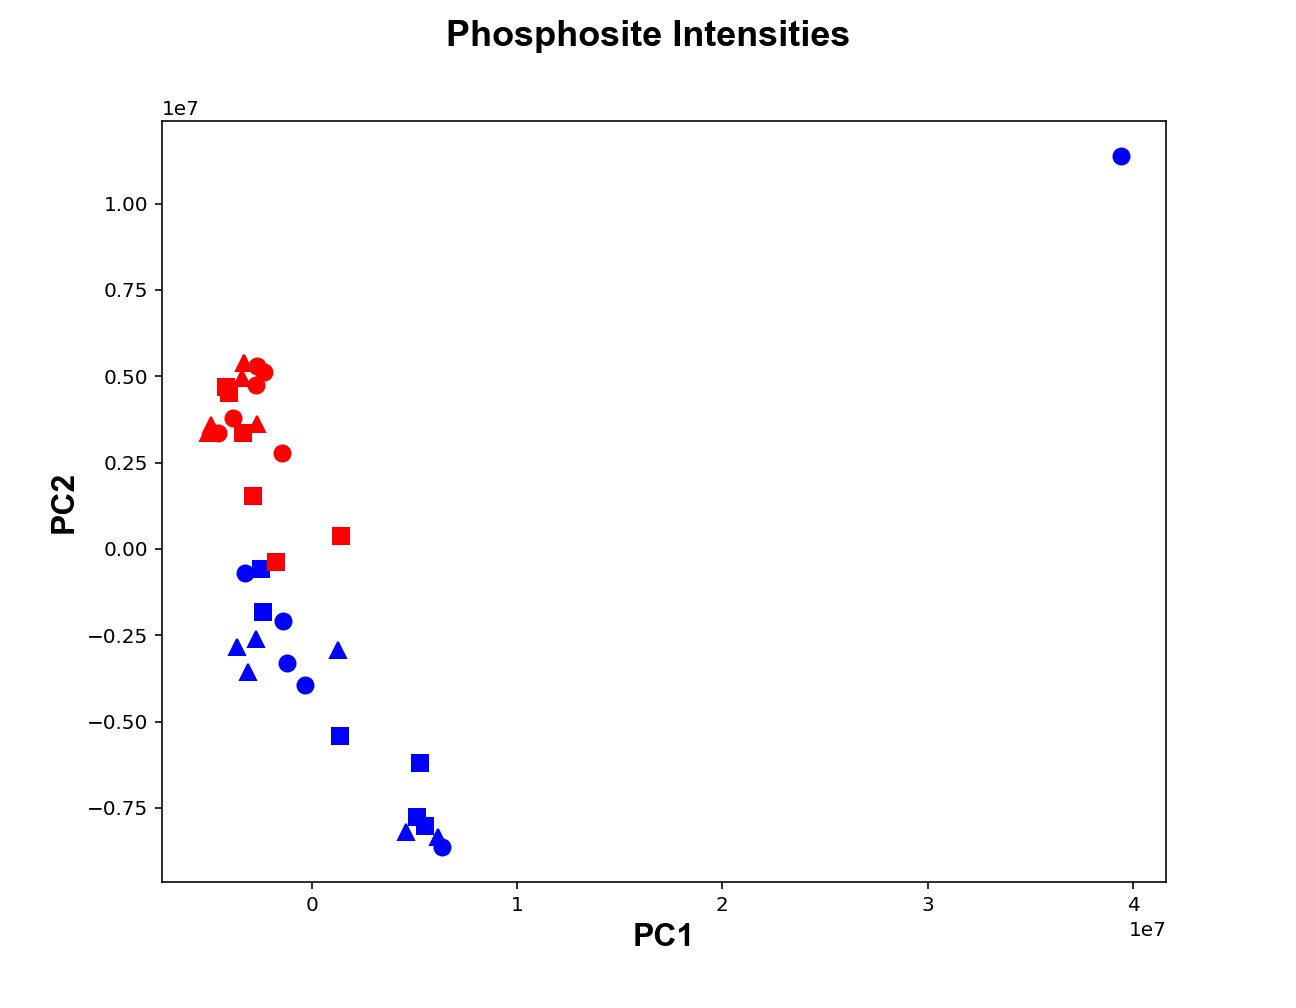

In [11]:
# 2D visualization
fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

plt.suptitle('Phosphosite Intensities',**fontTitle)

#xscale = pca.explained_variance_ratio_[0]
#yscale = pca.explained_variance_ratio_[1]

ax.plot(PCA_Intensities.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_Intensities.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'s',color='blue',label='TrkA, 0 min',ms=8)
ax.plot(PCA_Intensities.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_Intensities.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'o',color='blue',label='TrkA, 10 min',ms=8) 
ax.plot(PCA_Intensities.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_Intensities.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'^',color='blue',label='TrkA, 45 min',ms=8) 

ax.plot(PCA_Intensities.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_Intensities.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'s',color='red',label='TrkB, 0 min',ms=8) 
ax.plot(PCA_Intensities.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_Intensities.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'o',color='red',label='TrkB, 10 min',ms=8) 
ax.plot(PCA_Intensities.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_Intensities.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'^',color='red',label='TrkB, 45 min',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

#ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()

# no clear separation

In [12]:
numbers_rpl = MS_legend.loc[(MS_legend['Replicate'] == 1) & (MS_legend['Timepoint'] != 0)].index
str_rpl = ''
for number in numbers_rpl:
    str_rpl = str_rpl + str(number) + '|'
str_rpl = str_rpl[:-1]

psite_DF.filter(regex='Intensity A(' + str_rpl + ')_\d_S\d-[A-Z]\d+_\d_\d+$').columns

Index(['Intensity A2_1_S2-A3_1_5426', 'Intensity A2_2_S2-A4_1_5427',
       'Intensity A3_1_S2-A5_1_5428', 'Intensity A3_2_S2-A6_1_5429',
       'Intensity A4_1_S2-A7_1_5458', 'Intensity A4_2_S2-A8_1_5459',
       'Intensity A5_1_S2-A9_1_5460', 'Intensity A5_2_S2-A10_1_5461',
       'Intensity A6_1_S2-A11_1_5432', 'Intensity A6_2_S2-A12_1_5433'],
      dtype='object')

In [13]:
# now wokring with fold changes
rpl = 3 # number of replicates

psite_DF_FC = psite_DF.copy()
for rpli in range(rpl):
    numbers_rpl = MS_legend.loc[MS_legend['Replicate'] == rpli+1].index
    str_rpl = ''
    for number in numbers_rpl:
        str_rpl = str_rpl + str(number) + '|'
    str_rpl = str_rpl[:-1]
    # TrkA
    av_A = psite_DF.filter(regex='Intensity A(' + str(numbers_0_ctrls[rpli]) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)
    cols = psite_DF.filter(regex='Intensity A(' + str_rpl + ')_\d_S\d-[A-Z]\d+_\d_\d+$').columns
    for col in cols:
        psite_DF_FC[col]=psite_DF[col].divide(av_A,axis=0)
    # TrkB
    av_B = psite_DF.filter(regex='Intensity B(' + str(numbers_0_ctrls[rpli]) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)
    cols = psite_DF.filter(regex='Intensity B(' + str_rpl + ')_\d_S\d-[A-Z]\d+_\d_\d+$').columns
    for col in cols:
        psite_DF_FC[col]=psite_DF[col].divide(av_B,axis=0)
    
psite_DF_FC = psite_DF_FC.replace([np.inf, -np.inf], np.nan).fillna(1)
#psite_DF_FC_ctrls = psite_DF_FC[controls_A_0+controls_A_10+controls_A_45+controls_B_0+controls_B_10+controls_B_45]
psite_DF_FC

,Proteins,Positions within proteins,Protein names,Gene names,Intensity A1_1_S2-A1_1_5424,Intensity A1_2_S2-A2_1_5425,Intensity A10_1_S2-B7_1_5440,Intensity A10_2_S2-B8_1_5441,Intensity A11_1_S2-B9_1_5442,Intensity A11_2_S2-B10_1_5443,...,Intensity B5_1_S1-A9_1_5396,Intensity B5_2_S1-A10_1_5397,Intensity B6_1_S1-A11_1_5398,Intensity B6_2_S1-A12_1_5399,Intensity B7_1_S1-B1_1_5400,Intensity B7_2_S1-B2_1_5401,Intensity B8_1_S1-B3_1_5402,Intensity B8_2_S1-B4_1_5403,Intensity B9_1_S1-B5_1_5404,Intensity B9_2_S1-B6_1_5405
Merge_ID,,,,,,,,,,,,,,,,,,,,,
A0A1B0GTU1;O75152 psite 759;758,A0A1B0GTU1;O75152,759;758,Zinc finger CCCH domain-containing protein 11A,ZC3H11A,1.0,1.0,1.205072,1.388111,0.000000,1.53546,...,0.99831,0.00000,0.000000,0.839562,0.000000,2.000000,1.827545,2.031106,1.739833,1.931963
A0A1B0GTU1;O75152 psite 760;759,A0A1B0GTU1;O75152,760;759,Zinc finger CCCH domain-containing protein 11A,ZC3H11A,1.0,1.0,1.000000,1.000000,1.000000,1.00000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 730;758;779;165,A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5,730;758;779;165,Extended synaptotagmin-2,ESYT2,1.0,1.0,1.000000,1.000000,1.000000,1.00000,...,0.00000,2.09961,2.569235,1.673015,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5 psite 733;761;782;168,A0FGR8-2;A0FGR8;A0FGR8-6;A0FGR8-5,733;761;782;168,Extended synaptotagmin-2,ESYT2,1.0,1.0,1.000000,1.000000,1.000000,1.00000,...,0.00000,2.09961,2.569235,1.673015,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A0JLT2 psite 226,A0JLT2,226,Mediator of RNA polymerase II transcription su...,MED19,1.0,1.0,0.788339,1.000558,0.463482,0.00000,...,1.00000,1.00000,1.000000,1.000000,0.872226,1.127774,0.000000,0.000000,0.000000,1.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9UGU5 psite 462,Q9UGU5,462,HMG domain-containing protein 4,HMGXB4,1.0,1.0,1.000000,1.000000,1.000000,1.00000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Q9ULT8 psite 1872,Q9ULT8,1872,E3 ubiquitin-protein ligase HECTD1,HECTD1,1.0,1.0,1.000000,1.000000,1.000000,1.00000,...,1.00000,1.00000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
Q9UMS6;Q9UMS6-3;Q9UMS6-5;Q9UMS6-4;Q9UMS6-2 psite 735;735;340;704;735,Q9UMS6;Q9UMS6-3;Q9UMS6-5;Q9UMS6-4;Q9UMS6-2,735;735;340;704;735,Synaptopodin-2,SYNPO2,1.0,1.0,1.000000,1.000000,1.000000,1.00000,...,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# running PCA on intensities
pca = PCA(n_components=3)
Spca = pca.fit_transform(psite_DF_FC.filter(regex='Intensity').transpose())
#Spca = pca.fit_transform(psite_DF_FC_ctrls.transpose())
#Spca = pca.transform(psite_DF_FC.filter(regex='Intensity').transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_FCs = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=psite_DF_FC.filter(regex='Intensity').columns)
#PCA_FCs.to_csv('Evosep_phospho_PCA_FCs.csv')
PCA_FCs

Explained variances by components:  [0.35936579 0.17661562 0.13601799] total variance explained:  0.6719993991318971


,PC1,PC2,PC3
Intensity A1_1_S2-A1_1_5424,-18.553588,-30.709489,-11.330664
Intensity A1_2_S2-A2_1_5425,-17.327048,-24.889081,-12.452586
Intensity A10_1_S2-B7_1_5440,-21.731604,-38.473781,-13.728986
Intensity A10_2_S2-B8_1_5441,-21.884249,-38.579296,-15.201452
Intensity A11_1_S2-B9_1_5442,-22.409758,-41.584253,-13.527395
...,...,...,...
Intensity B7_2_S1-B2_1_5401,-17.527566,-27.193902,-12.075884
Intensity B8_1_S1-B3_1_5402,-20.981740,-28.037911,-12.417893
Intensity B8_2_S1-B4_1_5403,-21.120896,-28.089025,-11.616416
Intensity B9_1_S1-B5_1_5404,-20.979053,-26.734735,-10.141032


<IPython.core.display.Javascript object>


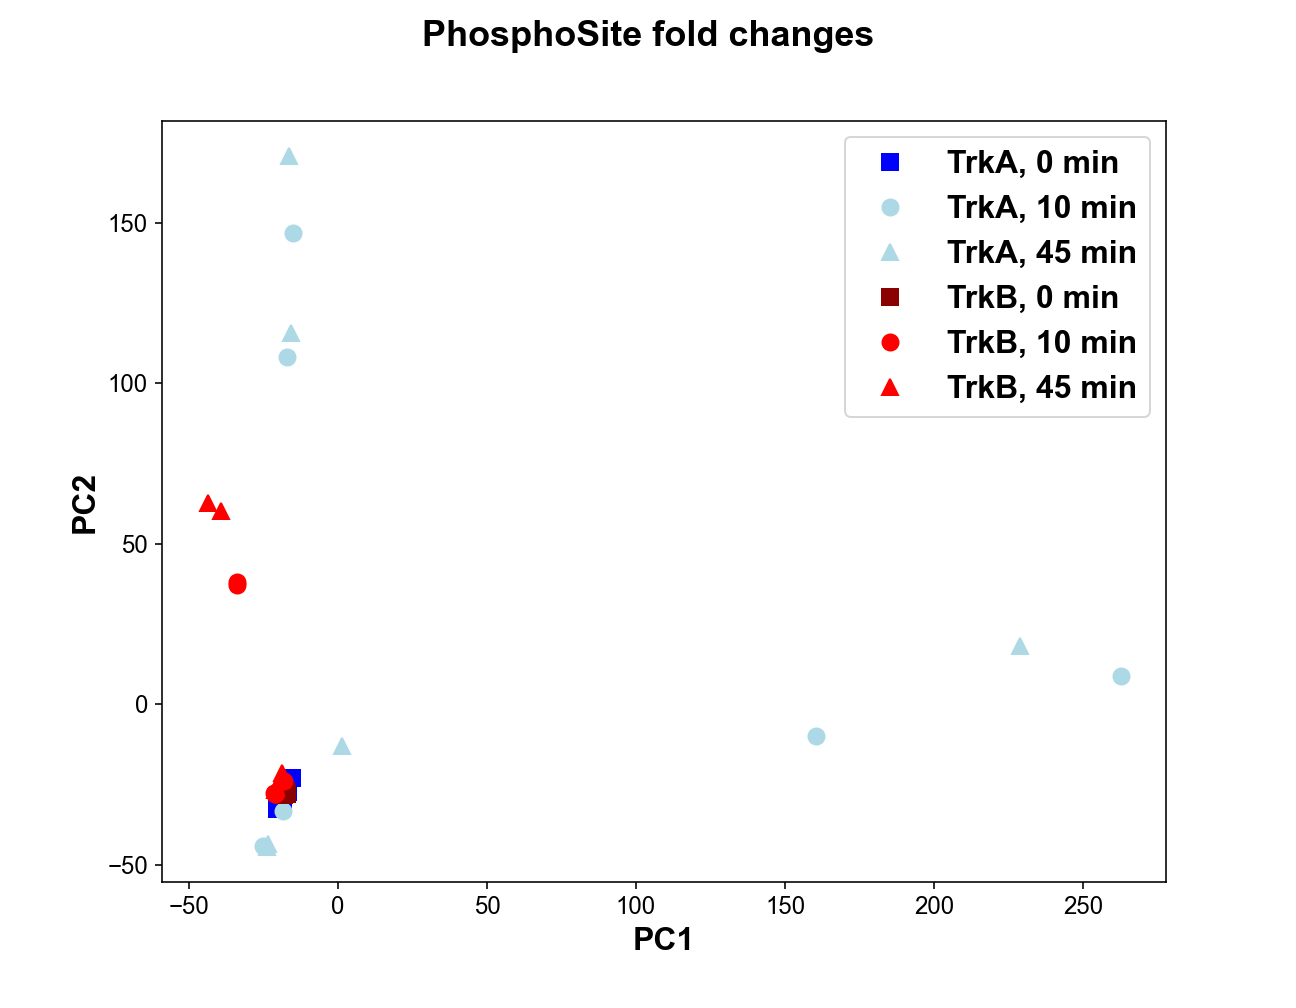

In [15]:
# 2D visualization
fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

plt.suptitle('PhosphoSite fold changes',**fontTitle)

#xscale = pca.explained_variance_ratio_[0]
#yscale = pca.explained_variance_ratio_[1]

ax.plot(PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'s',color='blue',label='TrkA, 0 min',ms=8) 
ax.plot(PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'o',color='lightblue',label='TrkA, 10 min',ms=8) 
ax.plot(PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'^',color='lightblue',label='TrkA, 45 min',ms=8) 

ax.plot(PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'s',color='darkred',label='TrkB, 0 min',ms=8) 
ax.plot(PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'o',color='red',label='TrkB, 10 min',ms=8) 
ax.plot(PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],'^',color='red',label='TrkB, 45 min',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()



<IPython.core.display.Javascript object>


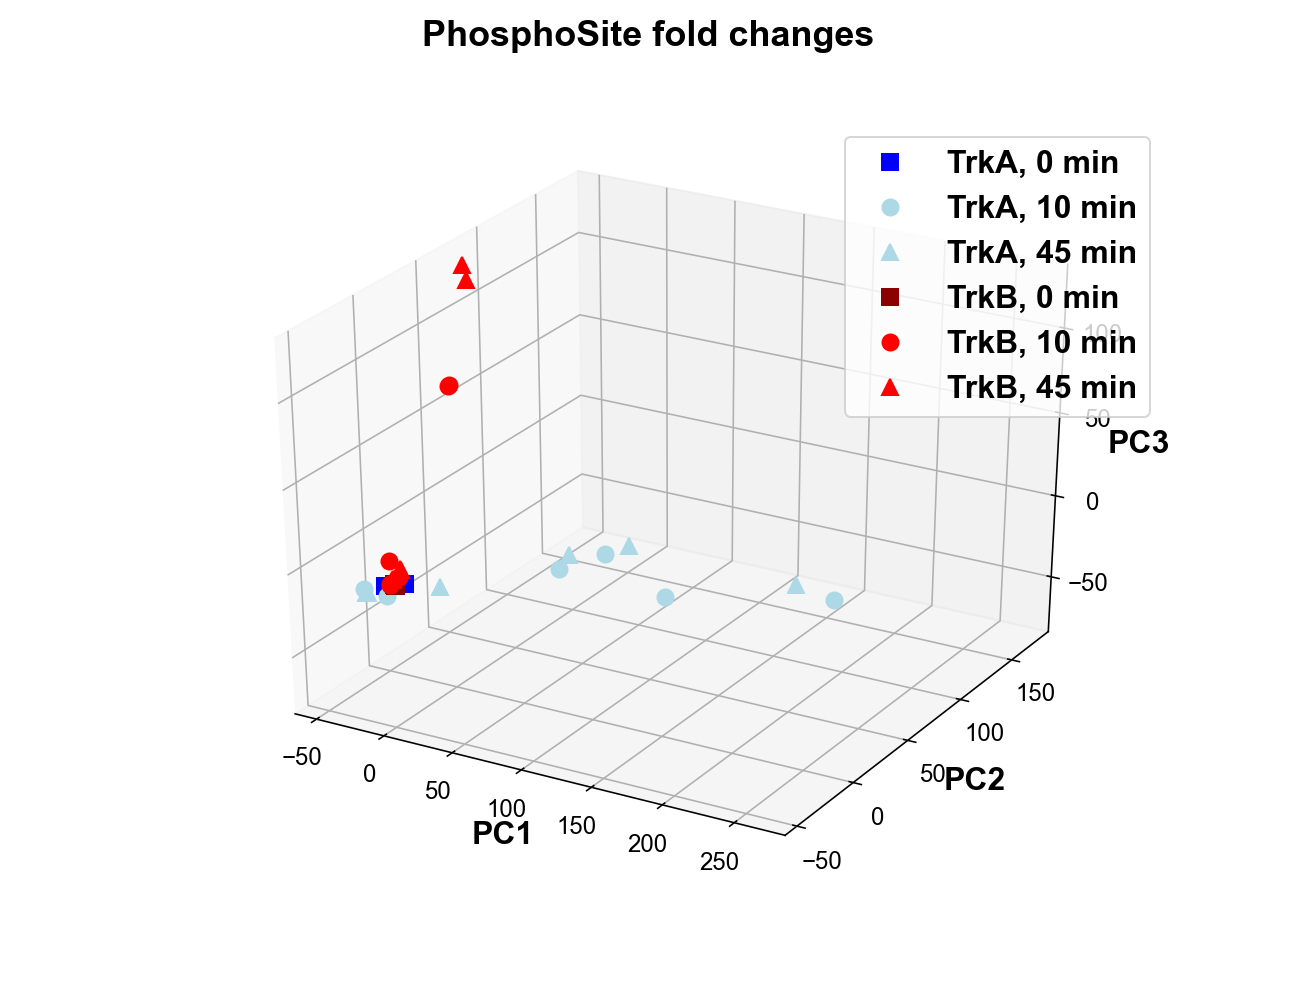

In [16]:
# 3D visualization
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

plt.suptitle('PhosphoSite fold changes',**fontTitle)

#xscale = pca.explained_variance_ratio_[0]
#yscale = pca.explained_variance_ratio_[1]

ax.plot3D(PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'s',color='blue',label='TrkA, 0 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'o',color='lightblue',label='TrkA, 10 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'^',color='lightblue',label='TrkA, 45 min',ms=8) 

ax.plot3D(PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'s',color='darkred',label='TrkB, 0 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'o',color='red',label='TrkB, 10 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'^',color='red',label='TrkB, 45 min',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()



In [17]:
training_A = pd.concat([PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0),PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0)])
training_B = pd.concat([PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0),PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0)])

#training_A = PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0)
#training_B = PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0)

training_total_PCA = pd.concat([training_A,training_B])

cls_PCA = list(np.zeros(len(training_A))) + list(np.ones(len(training_B)))

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(training_total_PCA,cls_PCA)

print(svc_PCA.intercept_)


[12.43381295]


<IPython.core.display.Javascript object>


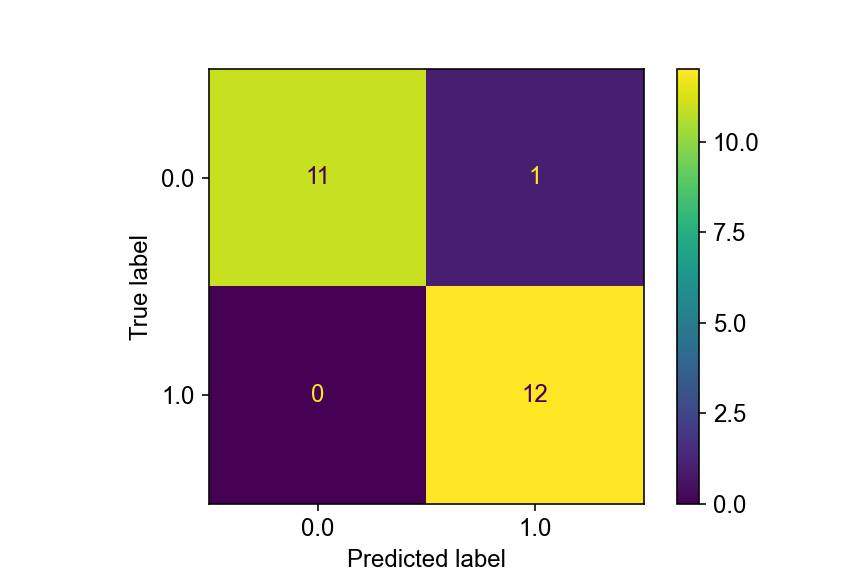

In [18]:
plot_confusion_matrix(svc_PCA,training_total_PCA,cls_PCA)


<IPython.core.display.Javascript object>


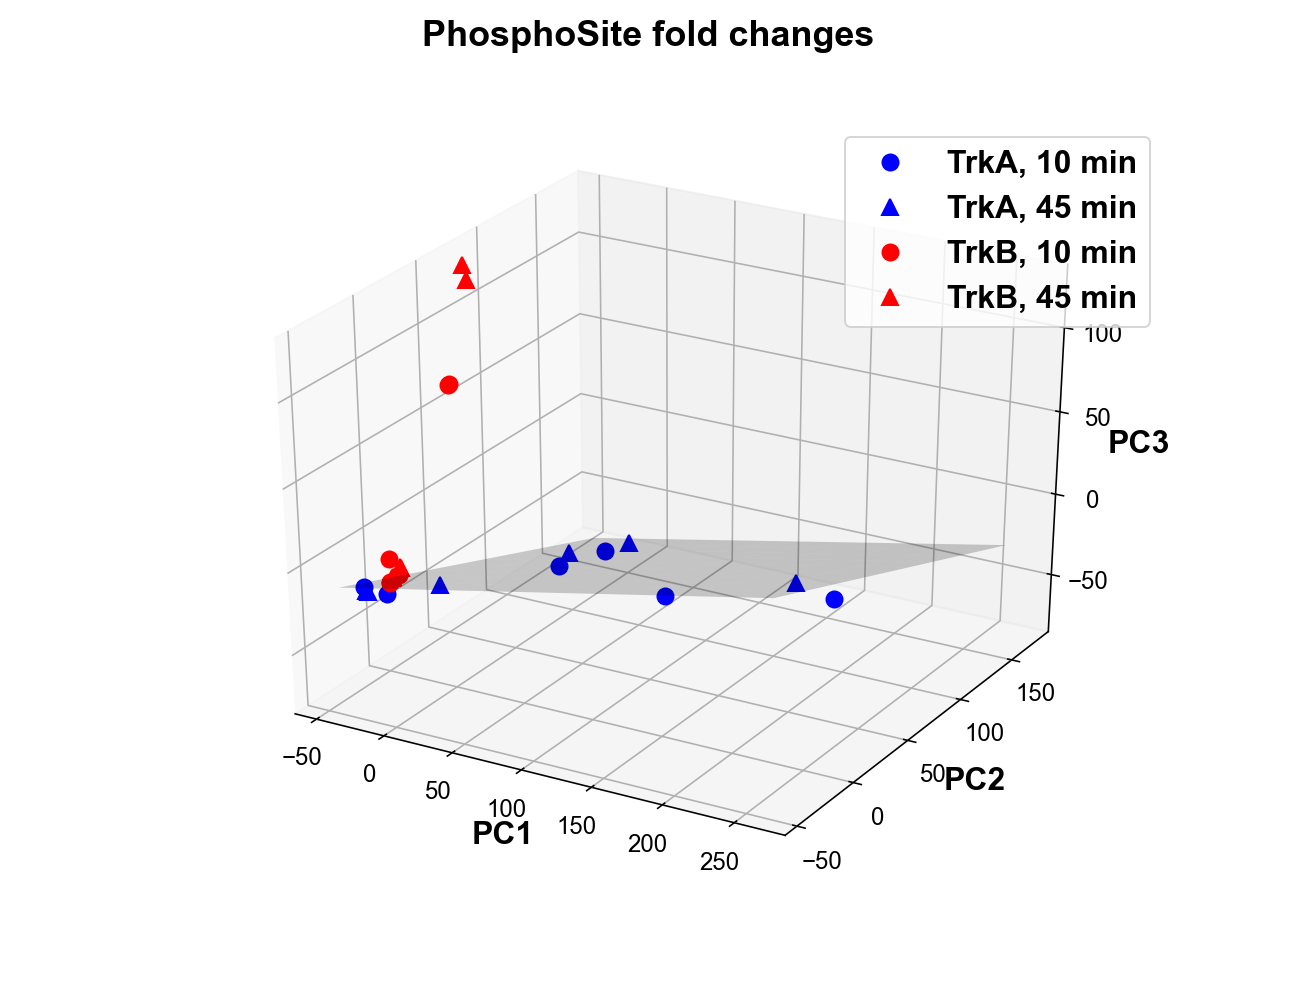

In [19]:
# 3D visualization with plane



fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

plt.suptitle('PhosphoSite fold changes',**fontTitle)

z2 = lambda x,y: (-svc_PCA.intercept_-svc_PCA.coef_[0][0]*x-svc_PCA.coef_[0][1]*y) / svc_PCA.coef_[0][2]
tmpx = np.linspace(min(training_total_PCA.iloc[:,0]),max(training_total_PCA.iloc[:,0]),10)
tmpy = np.linspace(min(training_total_PCA.iloc[:,1]),max(training_total_PCA.iloc[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)
zs = z2(xs,ys)

ax.plot_surface(xs, ys, zs,color='black',linewidth=0,alpha=0.2)


#ax.plot3D(PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'s',color='blue',label='TrkA, 0 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'o',color='blue',label='TrkA, 10 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'^',color='blue',label='TrkA, 45 min',ms=8) 

#ax.plot3D(PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'s',color='darkred',label='TrkB, 0 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'o',color='red',label='TrkB, 10 min',ms=8) 
ax.plot3D(PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,0],PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,1],PCA_FCs.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$',axis=0).iloc[:,2],'^',color='red',label='TrkB, 45 min',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()



In [20]:
trainset_A = psite_DF_FC.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$')
trainset_B = psite_DF_FC.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$')
psite_trainset = pd.concat([trainset_A,trainset_B],axis=1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(psite_trainset.transpose())
for i in range(len(kmeans.labels_)):
    print(psite_trainset.columns[i] + " - " + str(kmeans.labels_[i]))
#print(len(kmeans.labels_))
# they do not cluster together

Intensity A15_1_S2-C5_1_5450 - 1
Intensity A15_2_S2-C6_1_5451 - 0
Intensity A3_1_S2-A5_1_5428 - 1
Intensity A3_2_S2-A6_1_5429 - 1
Intensity A9_1_S2-B5_1_5438 - 1
Intensity A9_2_S2-B6_1_5439 - 1
Intensity B15_1_S1-C5_1_5416 - 1
Intensity B15_2_S1-C6_1_5417 - 1
Intensity B3_1_S1-A5_1_5392 - 1
Intensity B3_2_S1-A6_1_5393 - 1
Intensity B9_1_S1-B5_1_5404 - 1
Intensity B9_2_S1-B6_1_5405 - 1


In [21]:
#import seaborn as sns
#sns.clustermap(psite_trainset,cmap='jet',xticklabels=True,yticklabels=False,method='ward',metric='euclidean',figsize=(10,25))

In [22]:
psite_DF_FC.loc[psite_DF_FC['Gene names'].str.contains("MAPK",regex=True,na=False)]

,Proteins,Positions within proteins,Protein names,Gene names,Intensity A1_1_S2-A1_1_5424,Intensity A1_2_S2-A2_1_5425,Intensity A10_1_S2-B7_1_5440,Intensity A10_2_S2-B8_1_5441,Intensity A11_1_S2-B9_1_5442,Intensity A11_2_S2-B10_1_5443,...,Intensity B5_1_S1-A9_1_5396,Intensity B5_2_S1-A10_1_5397,Intensity B6_1_S1-A11_1_5398,Intensity B6_2_S1-A12_1_5399,Intensity B7_1_S1-B1_1_5400,Intensity B7_2_S1-B2_1_5401,Intensity B8_1_S1-B3_1_5402,Intensity B8_2_S1-B4_1_5403,Intensity B9_1_S1-B5_1_5404,Intensity B9_2_S1-B6_1_5405
Merge_ID,,,,,,,,,,,,,,,,,,,,,
Q8NDC0 psite 2,Q8NDC0,2,MAPK-interacting and spindle-stabilizing prote...,MAPK1IP1L,1.000000,1.000000,4.617630,0.000000,0.000000,4.850888,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Q8NDC0 psite 15,Q8NDC0,15,MAPK-interacting and spindle-stabilizing prote...,MAPK1IP1L,0.953519,1.046481,0.433033,0.526791,0.327811,0.510475,...,0.631516,0.610908,0.734284,0.642252,1.038944,0.961056,0.683439,0.684635,0.722586,0.773491
Q9BPZ7-4;Q9BPZ7-3;Q9BPZ7-2;Q9BPZ7 psite 318;463;474;510,Q9BPZ7-4;Q9BPZ7-3;Q9BPZ7-2;Q9BPZ7,318;463;474;510,Target of rapamycin complex 2 subunit MAPKAP1,MAPKAP1,2.000000,0.000000,0.000000,0.701283,0.000000,0.626339,...,0.893046,0.867441,0.000000,0.953230,2.000000,0.000000,0.000000,0.000000,1.727239,0.000000
Q9UQF2 psite 15,Q9UQF2,15,C-Jun-amino-terminal kinase-interacting protein 1,MAPK8IP1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
P27361-2;P27361-3;P27361 psite 202;202;202,P27361-2;P27361-3;P27361,202;202;202,Mitogen-activated protein kinase 3,MAPK3,1.000000,1.000000,0.000000,0.000000,2.099722,2.588326,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
P28482-2;P28482 psite 185;185,P28482-2;P28482,185;185,Mitogen-activated protein kinase 1,MAPK1,1.004704,0.995296,0.000000,0.000000,2.103117,2.595490,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Q9BPZ7-4;Q9BPZ7-3;Q9BPZ7-2;Q9BPZ7 psite 317;462;473;509,Q9BPZ7-4;Q9BPZ7-3;Q9BPZ7-2;Q9BPZ7,317;462;473;509,Target of rapamycin complex 2 subunit MAPKAP1,MAPKAP1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.046423,1.893778,0.000000,1.915977
P27361-2;P27361-3;P27361 psite 204;204;204,P27361-2;P27361-3;P27361,204;204;204,Mitogen-activated protein kinase 3,MAPK3,1.000000,1.000000,0.000000,0.000000,2.099722,2.588326,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
P28482-2;P28482 psite 187;187,P28482-2;P28482,187;187,Mitogen-activated protein kinase 1,MAPK1,1.031670,0.968330,0.000000,0.000000,1.830872,2.239354,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# now let's check how specific phosphosites look like

# first, let's figure out how many phosphosites we have for specific gene
gene_name='MAPK3'
psite_DF_FC.loc[psite_DF_FC['Gene names'] == gene_name]['Positions within proteins']

Merge_ID
P27361-2;P27361-3;P27361 psite 202;202;202    202;202;202
P27361-2;P27361-3;P27361 psite 204;204;204    204;204;204
Name: Positions within proteins, dtype: object

In [24]:
position = '204;204;204'

In [25]:
# plot per replicate

<IPython.core.display.Javascript object>


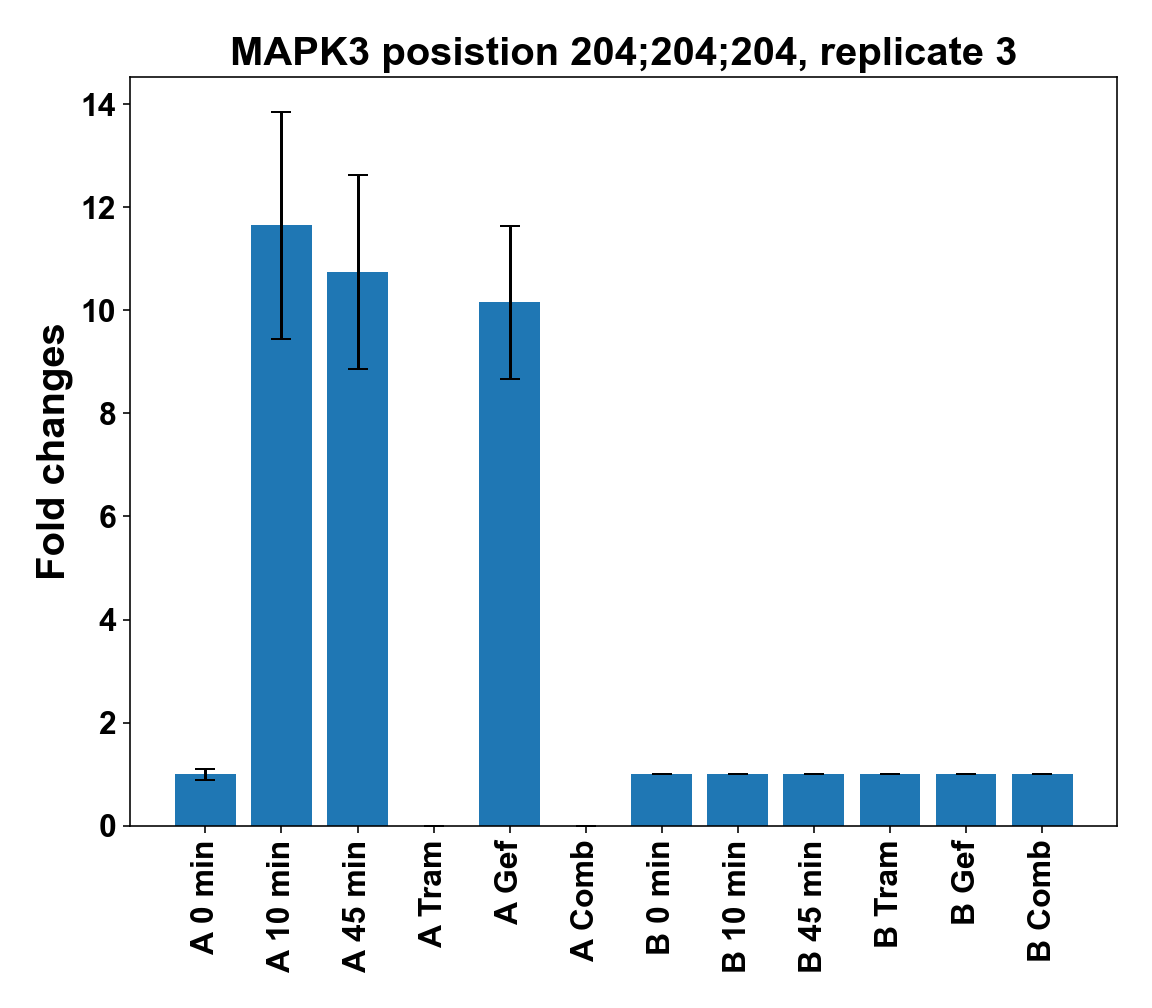

In [26]:
# fold changes
rpl = 3

psite_FC = psite_DF_FC.loc[(psite_DF_FC['Gene names'] == gene_name) & (psite_DF_FC['Positions within proteins'] == position)]

TrkA_0_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_0_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_A_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_A_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

TrkB_0_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_0_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_B_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_B_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

names = ['A 0 min','A 10 min','A 45 min','A Tram','A Gef','A Comb','B 0 min','B 10 min','B 45 min','B Tram','B Gef','B Comb']
values = [TrkA_0_vals,TrkA_10_vals,TrkA_45_vals,Tram_A_vals,Gef_A_vals,Comb_A_vals,TrkB_0_vals,TrkB_10_vals,TrkB_45_vals,Tram_B_vals,Gef_B_vals,Comb_B_vals]
errors = [TrkA_0_errs,TrkA_10_errs,TrkA_45_errs,Tram_A_errs,Gef_A_errs,Comb_A_errs,TrkB_0_errs,TrkB_10_errs,TrkB_45_errs,Tram_B_errs,Gef_B_errs,Comb_B_errs]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title(gene_name + ' posistion ' + str(position) + ", replicate " + str(rpl),**fontTitle)
plt.ylabel('Fold changes',**fontLabel)
plt.bar(names,values,yerr=errors,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


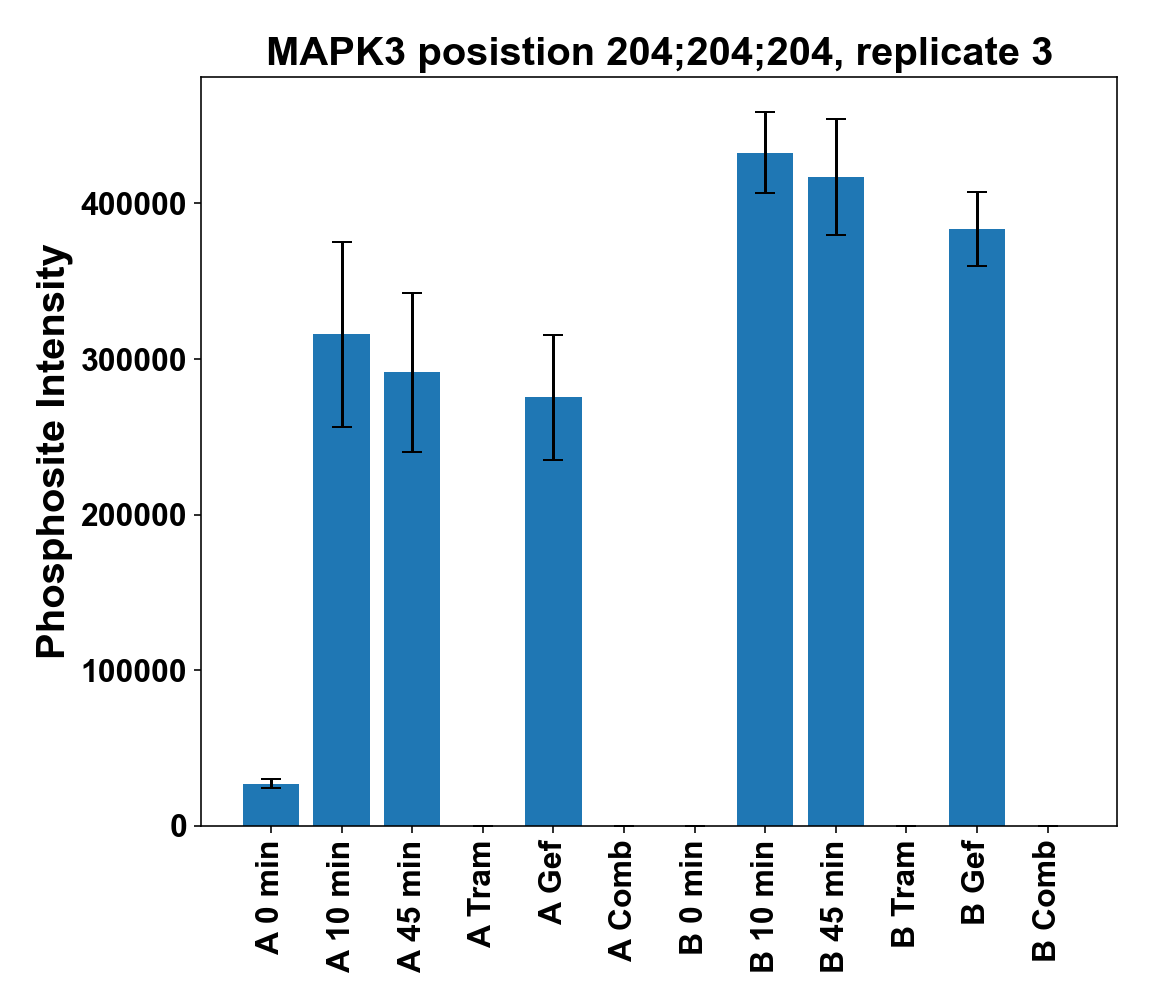

In [27]:
# intensities
psite_intens = psite_DF.loc[(psite_DF['Gene names'] == gene_name) & (psite_DF['Positions within proteins'] == position)]

TrkA_0_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_0_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_A_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_A_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

TrkB_0_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_0_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+1) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+2) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+3) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_B_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_B_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+4) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+5) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str(6*(rpl-1)+6) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

names = ['A 0 min','A 10 min','A 45 min','A Tram','A Gef','A Comb','B 0 min','B 10 min','B 45 min','B Tram','B Gef','B Comb']
values = [TrkA_0_vals,TrkA_10_vals,TrkA_45_vals,Tram_A_vals,Gef_A_vals,Comb_A_vals,TrkB_0_vals,TrkB_10_vals,TrkB_45_vals,Tram_B_vals,Gef_B_vals,Comb_B_vals]
errors = [TrkA_0_errs,TrkA_10_errs,TrkA_45_errs,Tram_A_errs,Gef_A_errs,Comb_A_errs,TrkB_0_errs,TrkB_10_errs,TrkB_45_errs,Tram_B_errs,Gef_B_errs,Comb_B_errs]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title(gene_name + ' posistion ' + str(position) + ", replicate " + str(rpl),**fontTitle)
plt.ylabel('Phosphosite Intensity',**fontLabel)
plt.bar(names,values,yerr=errors,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [28]:
# now plot for all replicates

<IPython.core.display.Javascript object>


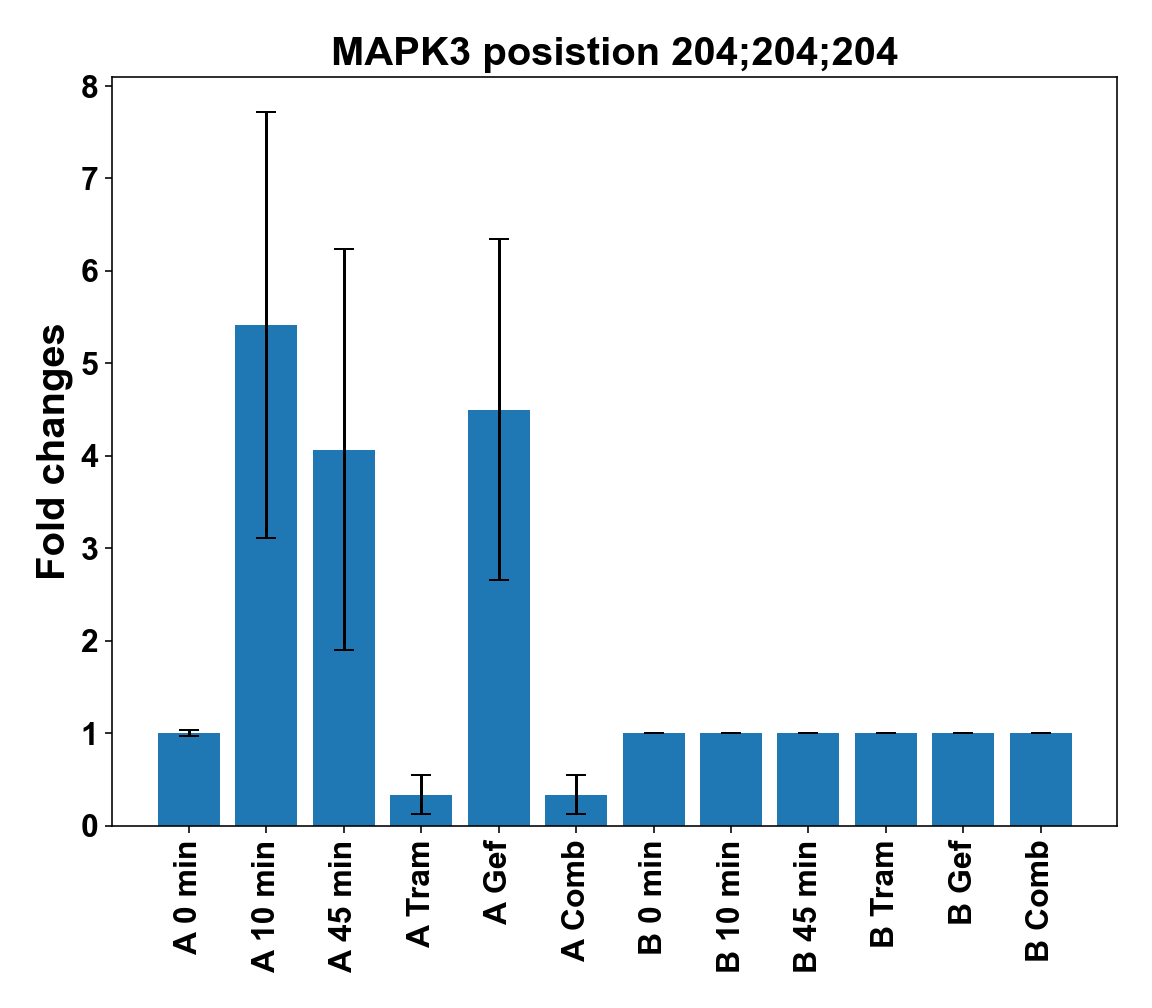

In [29]:
# now we plot for specific protein and position
psite_FC = psite_DF_FC.loc[(psite_DF_FC['Gene names'] == gene_name) & (psite_DF_FC['Positions within proteins'] == position)]

TrkA_0_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_0_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_A_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_A_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_vals = statistics.mean(psite_FC.filter(regex='Intensity A(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_errs = stats.sem(psite_FC.filter(regex='Intensity A(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

TrkB_0_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_0_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_B_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_B_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_vals = statistics.mean(psite_FC.filter(regex='Intensity B(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_errs = stats.sem(psite_FC.filter(regex='Intensity B(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

names = ['A 0 min','A 10 min','A 45 min','A Tram','A Gef','A Comb','B 0 min','B 10 min','B 45 min','B Tram','B Gef','B Comb']
values = [TrkA_0_vals,TrkA_10_vals,TrkA_45_vals,Tram_A_vals,Gef_A_vals,Comb_A_vals,TrkB_0_vals,TrkB_10_vals,TrkB_45_vals,Tram_B_vals,Gef_B_vals,Comb_B_vals]
errors = [TrkA_0_errs,TrkA_10_errs,TrkA_45_errs,Tram_A_errs,Gef_A_errs,Comb_A_errs,TrkB_0_errs,TrkB_10_errs,TrkB_45_errs,Tram_B_errs,Gef_B_errs,Comb_B_errs]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title(gene_name + ' posistion ' + str(position),**fontTitle)
plt.ylabel('Fold changes',**fontLabel)
plt.bar(names,values,yerr=errors,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


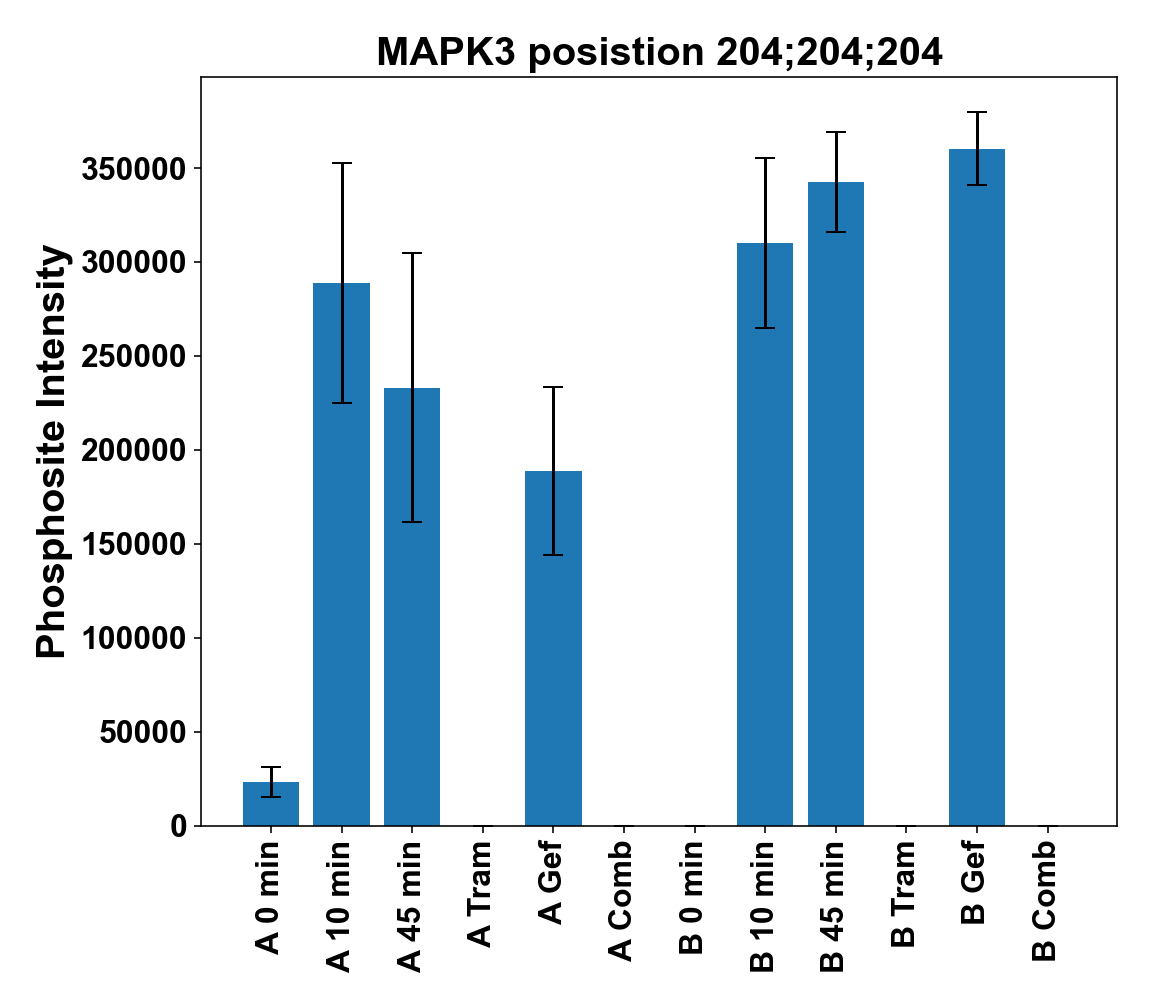

In [30]:
# same but for phosphosite intensities
psite_intens = psite_DF.loc[(psite_DF['Gene names'] == gene_name) & (psite_DF['Positions within proteins'] == position)]

TrkA_0_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_0_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_10_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkA_45_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_A_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_A_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_A_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_vals = statistics.mean(psite_intens.filter(regex='Intensity A(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_A_errs = stats.sem(psite_intens.filter(regex='Intensity A(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

TrkB_0_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_0_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str_0_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_10_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str_10_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
TrkB_45_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

Tram_B_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Tram_B_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str_45_Tram + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Gef_B_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str_45_Gef + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_vals = statistics.mean(psite_intens.filter(regex='Intensity B(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])
Comb_B_errs = stats.sem(psite_intens.filter(regex='Intensity B(' + str_45_Comb + ')_\d_S\d-[A-Z]\d+_\d_\d+$').iloc[0,:])

names = ['A 0 min','A 10 min','A 45 min','A Tram','A Gef','A Comb','B 0 min','B 10 min','B 45 min','B Tram','B Gef','B Comb']
values = [TrkA_0_vals,TrkA_10_vals,TrkA_45_vals,Tram_A_vals,Gef_A_vals,Comb_A_vals,TrkB_0_vals,TrkB_10_vals,TrkB_45_vals,Tram_B_vals,Gef_B_vals,Comb_B_vals]
errors = [TrkA_0_errs,TrkA_10_errs,TrkA_45_errs,Tram_A_errs,Gef_A_errs,Comb_A_errs,TrkB_0_errs,TrkB_10_errs,TrkB_45_errs,Tram_B_errs,Gef_B_errs,Comb_B_errs]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title(gene_name + ' posistion ' + str(position),**fontTitle)
plt.ylabel('Phosphosite Intensity',**fontLabel)
plt.bar(names,values,yerr=errors,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [31]:
# now we need to build STV and calculate DPDs

In [32]:
trainset_A = psite_DF_FC.filter(regex='Intensity A(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$')
trainset_B = psite_DF_FC.filter(regex='Intensity B(' + str_45_ctrls + ')_\d_S\d-[A-Z]\d+_\d_\d+$')
psite_trainset = pd.concat([trainset_A,trainset_B],axis=1)

cls = list(np.full(len(trainset_A.columns),0)) + list(np.full(len(trainset_B.columns),1))

svc = SVC(kernel='linear')
svc.fit(psite_trainset.transpose(),cls)
b_coeff = -svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = svc.coef_[0]/linalg.norm(svc.coef_[0])

A_cnt = psite_trainset.filter(regex='Intensity A').mean(axis=1)
B_cnt = psite_trainset.filter(regex='Intensity B').mean(axis=1)
s_vec = (B_cnt - A_cnt)/linalg.norm(B_cnt - A_cnt)

norm_vec_df = pd.DataFrame(s_vec,index=psite_trainset.index,columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
norm_vec_df.insert(0,'Gene names',psite_DF_FC['Gene names'])
norm_vec_df.insert(0,'Protein names',psite_DF_FC['Protein names'])
norm_vec_df.insert(0,'Positions within proteins',psite_DF_FC['Positions within proteins'])
norm_vec_df.insert(0,'Proteins',psite_DF_FC['Proteins'])
# plot STV ranking
#norm_vec_df.to_csv('Phospho_MS_STV.csv')
#norm_vec_df.sort_values(by='norm_vec')

angle = (np.arccos(np.dot(norm_vec,s_vec))/np.pi)*180
angle

54.039266057172895

<IPython.core.display.Javascript object>


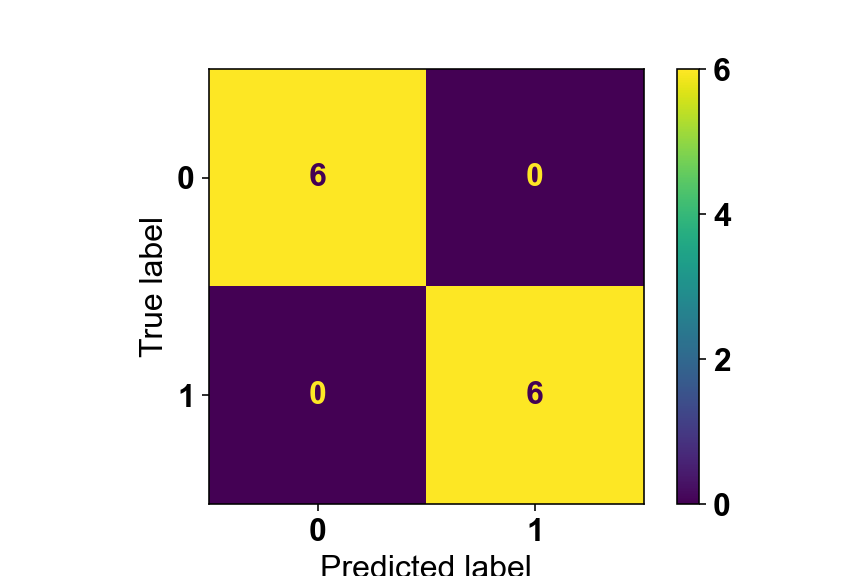

In [33]:
plot_confusion_matrix(svc,psite_trainset.transpose(),cls)
# clear separation

In [34]:
norm_vec_df.to_csv('Evosep_Phosphosites_STV.csv')
norm_vec_df.sort_values(by='norm_vec')

,Proteins,Positions within proteins,Protein names,Gene names,norm_vec,s_vec
Merge_ID,,,,,,
Q04726-2;Q04726-7;Q04726-3;Q04726-6;Q04726-5;Q04726-4;Q04726 psite 203;196;203;203;203;208;203,Q04726-2;Q04726-7;Q04726-3;Q04726-6;Q04726-5;Q...,203;196;203;203;203;208;203,Transducin-like enhancer protein 3,TLE3,-0.139142,-0.040655
P23528 psite 3,P23528,3,Cofilin-1,CFL1,-0.126465,-0.033324
Q12888;Q12888-3;Q12888-2 psite 630;635;635,Q12888;Q12888-3;Q12888-2,630;635;635,Tumor suppressor p53-binding protein 1,TP53BP1,-0.111669,-0.031546
P23396;P23396-2 psite 221;237,P23396;P23396-2,221;237,40S ribosomal protein S3,RPS3,-0.109498,-0.037123
Q9H6F5 psite 91,Q9H6F5,91,Coiled-coil domain-containing protein 86,CCDC86,-0.101571,-0.102367
...,...,...,...,...,...,...
P12270 psite 2155,P12270,2155,Nucleoprotein TPR,TPR,0.161396,0.071571
P04792 psite 15,P04792,15,Heat shock protein beta-1,HSPB1,0.178115,0.468222
O00273;O00273-2 psite 28;28,O00273;O00273-2,28;28,DNA fragmentation factor subunit alpha,DFFA,0.189252,0.076189


In [35]:
norm_vec_df.loc[psite_DF_FC['Gene names'].str.contains("RPS6",regex=True,na=False)]

,Proteins,Positions within proteins,Protein names,Gene names,norm_vec,s_vec
Merge_ID,,,,,,
P23443-3;P23443-5;P23443-2;P23443 psite 394;424;424;447,P23443-3;P23443-5;P23443-2;P23443,394;424;424;447,Ribosomal protein S6 kinase beta-1,RPS6KB1,-6.694335e-04,-0.003350
P51812;Q15418-3;Q15418-4;Q15418;Q15418-2;Q9UK32-2;Q9UK32 psite 227;129;205;221;230;232;232,P51812;Q15418-3;Q15418-4;Q15418;Q15418-2;Q9UK3...,227;129;205;221;230;232;232,Ribosomal protein S6 kinase alpha-3;Ribosomal ...,RPS6KA3;RPS6KA1;RPS6KA6,-4.940034e-04,-0.003350
P51812 psite 715,P51812,715,Ribosomal protein S6 kinase alpha-3,RPS6KA3,-4.940034e-04,-0.003350
P51812 psite 369,P51812,369,Ribosomal protein S6 kinase alpha-3,RPS6KA3,1.097118e-03,-0.006550
P62753 psite 235,P62753,235,40S ribosomal protein S6,RPS6,4.573402e-02,0.018787
P62753 psite 236,P62753,236,40S ribosomal protein S6,RPS6,-4.241843e-03,-0.010238
P62753 psite 240,P62753,240,40S ribosomal protein S6,RPS6,-6.306665e-03,-0.060838
P62753 psite 242,P62753,242,40S ribosomal protein S6,RPS6,-4.940034e-04,-0.003350
P62753 psite 244,P62753,244,40S ribosomal protein S6,RPS6,6.096442e-03,0.000000


In [36]:
# now we need to calculate DPDs
MS_legend['DPD_value_A']=np.nan
MS_legend['DPD_value_A_err']=np.nan
MS_legend['DPD_value_A1']=np.nan
MS_legend['DPD_value_A2']=np.nan
MS_legend['DPD_value_B']=np.nan
MS_legend['DPD_value_B_err']=np.nan
MS_legend['DPD_value_B1']=np.nan
MS_legend['DPD_value_B2']=np.nan

for smpl in MS_legend.index:
    MS_legend.at[smpl,'DPD_value_A1']=-(b_coeff - np.dot(norm_vec_df['norm_vec'],psite_DF_FC.filter(regex='Intensity A(' + str(smpl) + ')_1_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    MS_legend.at[smpl,'DPD_value_A2']=-(b_coeff - np.dot(norm_vec_df['norm_vec'],psite_DF_FC.filter(regex='Intensity A(' + str(smpl) + ')_2_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    MS_legend.at[smpl,'DPD_value_B1']=-(b_coeff - np.dot(norm_vec_df['norm_vec'],psite_DF_FC.filter(regex='Intensity B(' + str(smpl) + ')_1_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    MS_legend.at[smpl,'DPD_value_B2']=-(b_coeff - np.dot(norm_vec_df['norm_vec'],psite_DF_FC.filter(regex='Intensity B(' + str(smpl) + ')_2_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    MS_legend.at[smpl,'DPD_value_A']=-(b_coeff - np.dot(norm_vec_df['norm_vec'],psite_DF_FC.filter(regex='Intensity A(' + str(smpl) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    MS_legend.at[smpl,'DPD_value_B']=-(b_coeff - np.dot(norm_vec_df['norm_vec'],psite_DF_FC.filter(regex='Intensity B(' + str(smpl) + ')_\d_S\d-[A-Z]\d+_\d_\d+$').mean(axis=1)))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    MS_legend.at[smpl,'DPD_value_A_err']=stats.sem([MS_legend.at[smpl,'DPD_value_A1'],MS_legend.at[smpl,'DPD_value_A2']])
    MS_legend.at[smpl,'DPD_value_B_err']=stats.sem([MS_legend.at[smpl,'DPD_value_B1'],MS_legend.at[smpl,'DPD_value_B2']])
    
MS_legend.to_csv('DPD_vals.csv')
MS_legend

,Treatment,Timepoint,Replicate,DPD_value_A,DPD_value_A_err,DPD_value_A1,DPD_value_A2,DPD_value_B,DPD_value_B_err,DPD_value_B1,DPD_value_B2
ID,,,,,,,,,,,
1,nt,0,1,-14.439701,1.413868,-13.025832,-15.853569,-14.439701,0.257662,-14.182039,-14.697362
2,nt,10',1,-40.389580,0.885118,-39.504463,-41.274698,16.397612,2.551751,18.949363,13.845861
3,nt,45',1,-49.736108,0.000832,-49.736940,-49.735276,49.760653,0.000001,49.760652,49.760654
4,Trametinib,45',1,-28.237911,12.612996,-15.624915,-40.850908,19.928873,6.491148,13.437725,26.420022
5,Gefitinib,45',1,-24.844542,10.580270,-14.264272,-35.424812,32.014336,4.447769,27.566567,36.462106
6,Tram+Gef,45',1,-51.694335,7.826423,-59.520758,-43.867912,2.962909,0.192160,3.155069,2.770749
7,nt,0,2,-14.439701,0.365329,-14.074371,-14.805030,-14.439701,0.350566,-14.089134,-14.790267
8,nt,10',2,-34.131701,3.312270,-37.443971,-30.819432,16.921244,2.837617,14.083628,19.758861
9,nt,45',2,-49.764325,0.001372,-49.762953,-49.765696,49.745319,0.001220,49.744098,49.746539


<IPython.core.display.Javascript object>


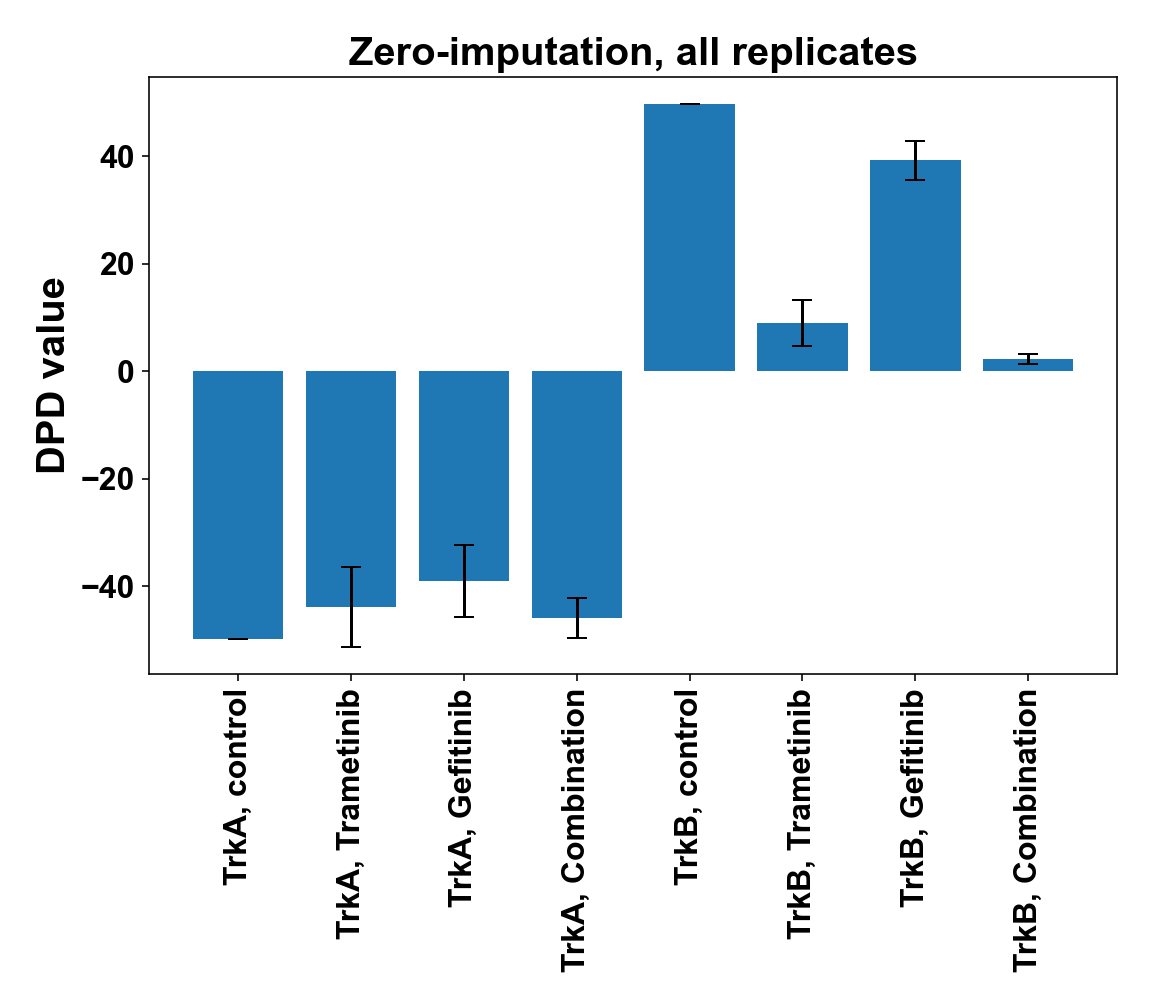

In [37]:
# plotting DPD values for 45 min

TrkA_ctrl = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
TrkA_ctrl_err = stats.sem(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
TrkB_ctrl = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))
TrkB_ctrl_err = stats.sem(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))

TrkA_Tram = statistics.mean(list(MS_legend.loc[numbers_45_Tram]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_A2']))
TrkA_Tram_err = stats.sem(list(MS_legend.loc[numbers_45_Tram]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_A2']))
TrkB_Tram = statistics.mean(list(MS_legend.loc[numbers_45_Tram]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_B2']))
TrkB_Tram_err = stats.sem(list(MS_legend.loc[numbers_45_Tram]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_B2']))

TrkA_Gef = statistics.mean(list(MS_legend.loc[numbers_45_Gef]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_A2']))
TrkA_Gef_err = stats.sem(list(MS_legend.loc[numbers_45_Gef]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_A2']))
TrkB_Gef = statistics.mean(list(MS_legend.loc[numbers_45_Gef]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_B2']))
TrkB_Gef_err = stats.sem(list(MS_legend.loc[numbers_45_Gef]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_B2']))

TrkA_Comb = statistics.mean(list(MS_legend.loc[numbers_45_Comb]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_A2']))
TrkA_Comb_err = stats.sem(list(MS_legend.loc[numbers_45_Comb]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_A2']))
TrkB_Comb = statistics.mean(list(MS_legend.loc[numbers_45_Comb]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_B2']))
TrkB_Comb_err = stats.sem(list(MS_legend.loc[numbers_45_Comb]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_B2']))

names = ['TrkA, control','TrkA, Trametinib','TrkA, Gefitinib','TrkA, Combination','TrkB, control','TrkB, Trametinib','TrkB, Gefitinib','TrkB, Combination']
values = [TrkA_ctrl,TrkA_Tram,TrkA_Gef,TrkA_Comb,TrkB_ctrl,TrkB_Tram,TrkB_Gef,TrkB_Comb]
errors = [TrkA_ctrl_err,TrkA_Tram_err,TrkA_Gef_err,TrkA_Comb_err,TrkB_ctrl_err,TrkB_Tram_err,TrkB_Gef_err,TrkB_Comb_err]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('Zero-imputation, all replicates',**fontTitle)
plt.ylabel('DPD value',**fontLabel)
plt.bar(names,values,yerr=errors,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

['nt', 'Trametinib', 'Gefitinib', 'Tram+Gef']
[3, 3, 3, 3]


<IPython.core.display.Javascript object>


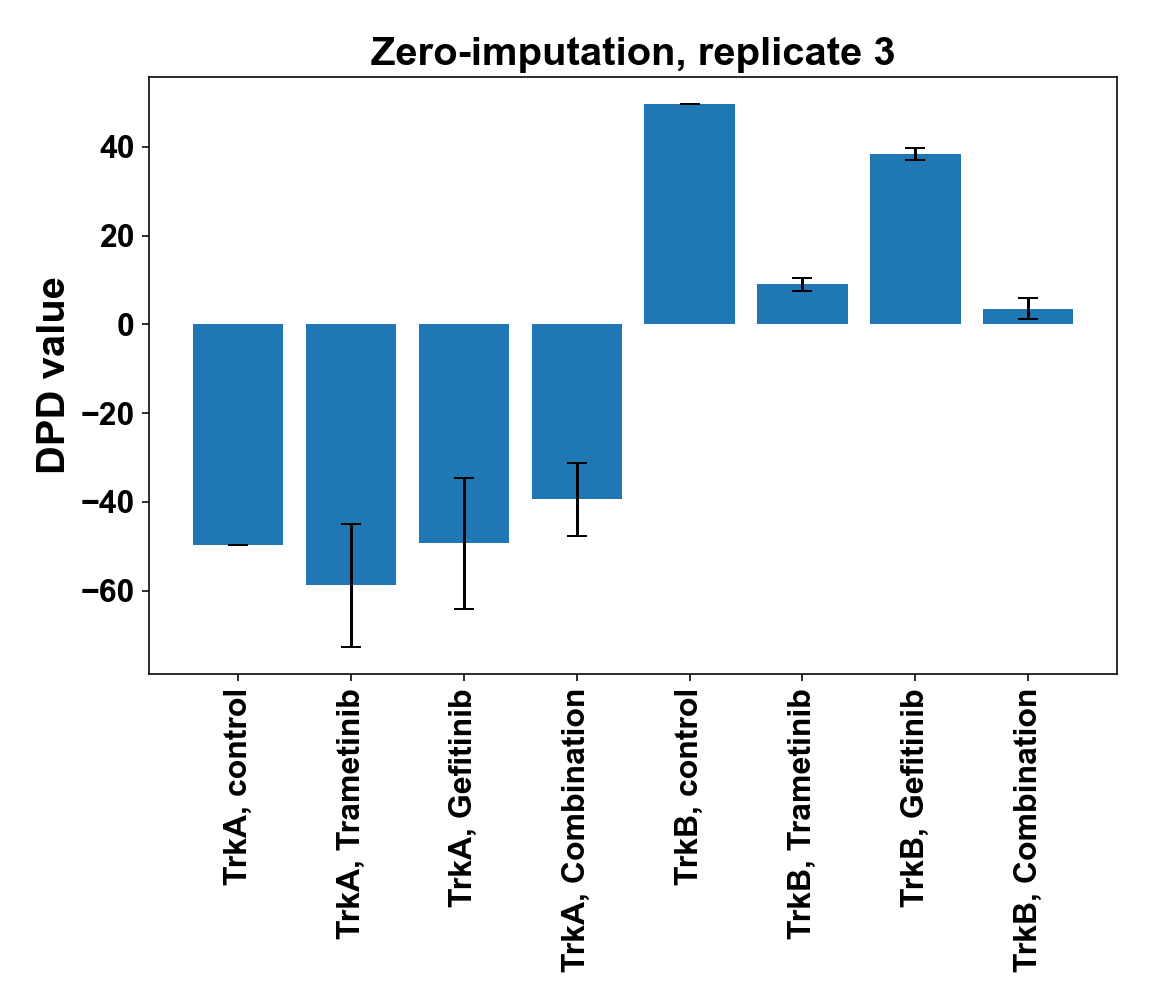

In [38]:
rpl=3

names = ['TrkA, control','TrkA, Trametinib','TrkA, Gefitinib','TrkA, Combination','TrkB, control','TrkB, Trametinib','TrkB, Gefitinib','TrkB, Combination']
values = [MS_legend.iloc[6*(rpl-1)+2]['DPD_value_A'],MS_legend.iloc[6*(rpl-1)+3]['DPD_value_A'],MS_legend.iloc[6*(rpl-1)+4]['DPD_value_A'],MS_legend.iloc[6*(rpl-1)+5]['DPD_value_A'],MS_legend.iloc[6*(rpl-1)+2]['DPD_value_B'],MS_legend.iloc[6*(rpl-1)+3]['DPD_value_B'],MS_legend.iloc[6*(rpl-1)+4]['DPD_value_B'],MS_legend.iloc[6*(rpl-1)+5]['DPD_value_B']]
errors = [MS_legend.iloc[6*(rpl-1)+2]['DPD_value_A_err'],MS_legend.iloc[6*(rpl-1)+3]['DPD_value_A_err'],MS_legend.iloc[6*(rpl-1)+4]['DPD_value_A_err'],MS_legend.iloc[6*(rpl-1)+5]['DPD_value_A_err'],MS_legend.iloc[6*(rpl-1)+2]['DPD_value_B_err'],MS_legend.iloc[6*(rpl-1)+3]['DPD_value_B_err'],MS_legend.iloc[6*(rpl-1)+4]['DPD_value_B_err'],MS_legend.iloc[6*(rpl-1)+5]['DPD_value_B_err']]
names_tmp = [MS_legend.iloc[6*(rpl-1)+2]['Treatment'],MS_legend.iloc[6*(rpl-1)+3]['Treatment'],MS_legend.iloc[6*(rpl-1)+4]['Treatment'],MS_legend.iloc[6*(rpl-1)+5]['Treatment']]
reps_tmp = [MS_legend.iloc[6*(rpl-1)+2]['Replicate'],MS_legend.iloc[6*(rpl-1)+3]['Replicate'],MS_legend.iloc[6*(rpl-1)+4]['Replicate'],MS_legend.iloc[6*(rpl-1)+5]['Replicate']]
print(names_tmp)
print(reps_tmp)

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('Zero-imputation, replicate ' + str(rpl),**fontTitle)
plt.ylabel('DPD value',**fontLabel)
plt.bar(names,values,yerr=errors,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [39]:
# now let's calculate Bliss scores for each measurement
#first, calculating effects Y, then Bliss score will be calculated in the Excel file

DPD_A = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
DPD_B = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))
MS_legend['Y1']=np.nan
MS_legend['Y2']=np.nan

for smpl in MS_legend.index:
    MS_legend.at[smpl,'Y1'] = (MS_legend.loc[smpl,'DPD_value_B1'] - DPD_A)/(DPD_B - DPD_A)
    MS_legend.at[smpl,'Y2'] = (MS_legend.loc[smpl,'DPD_value_B2'] - DPD_A)/(DPD_B - DPD_A)
MS_legend.to_csv('DPDs_Ys.csv')
MS_legend

,Treatment,Timepoint,Replicate,DPD_value_A,DPD_value_A_err,DPD_value_A1,DPD_value_A2,DPD_value_B,DPD_value_B_err,DPD_value_B1,DPD_value_B2,Y1,Y2
ID,,,,,,,,,,,,,
1,nt,0,1,-14.439701,1.413868,-13.025832,-15.853569,-14.439701,0.257662,-14.182039,-14.697362,0.357465,0.352285
2,nt,10',1,-40.389580,0.885118,-39.504463,-41.274698,16.397612,2.551751,18.949363,13.845861,0.690449,0.639157
3,nt,45',1,-49.736108,0.000832,-49.736940,-49.735276,49.760653,0.000001,49.760652,49.760654,1.000115,1.000115
4,Trametinib,45',1,-28.237911,12.612996,-15.624915,-40.850908,19.928873,6.491148,13.437725,26.420022,0.635055,0.765532
5,Gefitinib,45',1,-24.844542,10.580270,-14.264272,-35.424812,32.014336,4.447769,27.566567,36.462106,0.777055,0.866459
6,Tram+Gef,45',1,-51.694335,7.826423,-59.520758,-43.867912,2.962909,0.192160,3.155069,2.770749,0.531710,0.527847
7,nt,0,2,-14.439701,0.365329,-14.074371,-14.805030,-14.439701,0.350566,-14.089134,-14.790267,0.358398,0.351352
8,nt,10',2,-34.131701,3.312270,-37.443971,-30.819432,16.921244,2.837617,14.083628,19.758861,0.641546,0.698585
9,nt,45',2,-49.764325,0.001372,-49.762953,-49.765696,49.745319,0.001220,49.744098,49.746539,0.999949,0.999973


0.7263893959819322
0.5225742349691462
0.20381516101278596


<IPython.core.display.Javascript object>


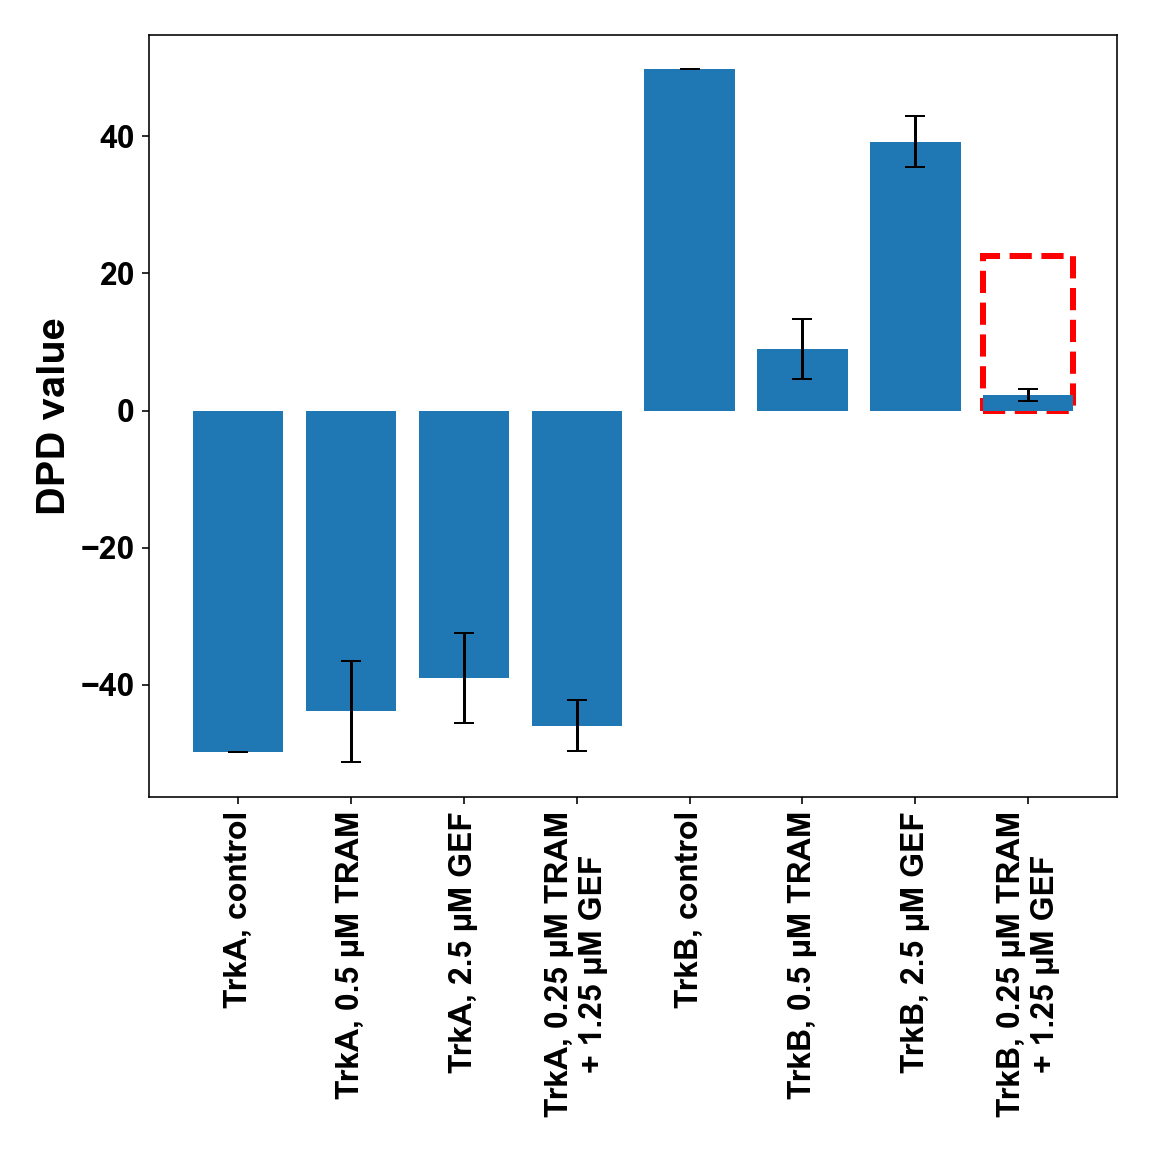

In [40]:
# plotting DPD values for 45 min

TrkA_ctrl = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
TrkA_ctrl_err = stats.sem(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
TrkB_ctrl = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))
TrkB_ctrl_err = stats.sem(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))

TrkA_Tram = statistics.mean(list(MS_legend.loc[numbers_45_Tram]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_A2']))
TrkA_Tram_err = stats.sem(list(MS_legend.loc[numbers_45_Tram]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_A2']))
TrkB_Tram = statistics.mean(list(MS_legend.loc[numbers_45_Tram]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_B2']))
TrkB_Tram_err = stats.sem(list(MS_legend.loc[numbers_45_Tram]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_B2']))

TrkA_Gef = statistics.mean(list(MS_legend.loc[numbers_45_Gef]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_A2']))
TrkA_Gef_err = stats.sem(list(MS_legend.loc[numbers_45_Gef]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_A2']))
TrkB_Gef = statistics.mean(list(MS_legend.loc[numbers_45_Gef]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_B2']))
TrkB_Gef_err = stats.sem(list(MS_legend.loc[numbers_45_Gef]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_B2']))

TrkA_Comb = statistics.mean(list(MS_legend.loc[numbers_45_Comb]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_A2']))
TrkA_Comb_err = stats.sem(list(MS_legend.loc[numbers_45_Comb]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_A2']))
TrkB_Comb = statistics.mean(list(MS_legend.loc[numbers_45_Comb]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_B2']))
TrkB_Comb_err = stats.sem(list(MS_legend.loc[numbers_45_Comb]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_B2']))

names = ['TrkA, control','TrkA, 0.5 µM TRAM','TrkA, 2.5 µM GEF','TrkA, 0.25 µM TRAM\n+ 1.25 µM GEF','TrkB, control','TrkB, 0.5 µM TRAM','TrkB, 2.5 µM GEF','TrkB, 0.25 µM TRAM\n+ 1.25 µM GEF']
values = [TrkA_ctrl,TrkA_Tram,TrkA_Gef,TrkA_Comb,TrkB_ctrl,TrkB_Tram,TrkB_Gef,TrkB_Comb]
errors = [TrkA_ctrl_err,TrkA_Tram_err,TrkA_Gef_err,TrkA_Comb_err,TrkB_ctrl_err,TrkB_Tram_err,TrkB_Gef_err,TrkB_Comb_err]

Y_Tram = (values[5] - DPD_A)/(DPD_B - DPD_A)
Y_Gef  = (values[6] - DPD_A)/(DPD_B - DPD_A)
Y_Comb = (values[7] - DPD_A)/(DPD_B - DPD_A)
Y_Comb_Bliss = np.sqrt(Y_Tram)*np.sqrt(Y_Gef)
value_comb_Bliss = Y_Comb_Bliss*(DPD_B - DPD_A) + DPD_A
print(Y_Comb_Bliss)
print(Y_Comb)
print(Y_Comb_Bliss - Y_Comb)

fig = plt.figure(figsize=(8,8))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

#plt.title('Phenotypic effect of kinase inhibitors on TrkA and TrkB cells',**fontTitle)
plt.ylabel('DPD value',**fontLabel)
plt.bar(7,value_comb_Bliss,color='white',edgecolor='red',linewidth=3,linestyle='dashed')
plt.bar(names,values,yerr=errors,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

0.7263893959819322
0.5225742349691462
0.20381516101278596


<IPython.core.display.Javascript object>


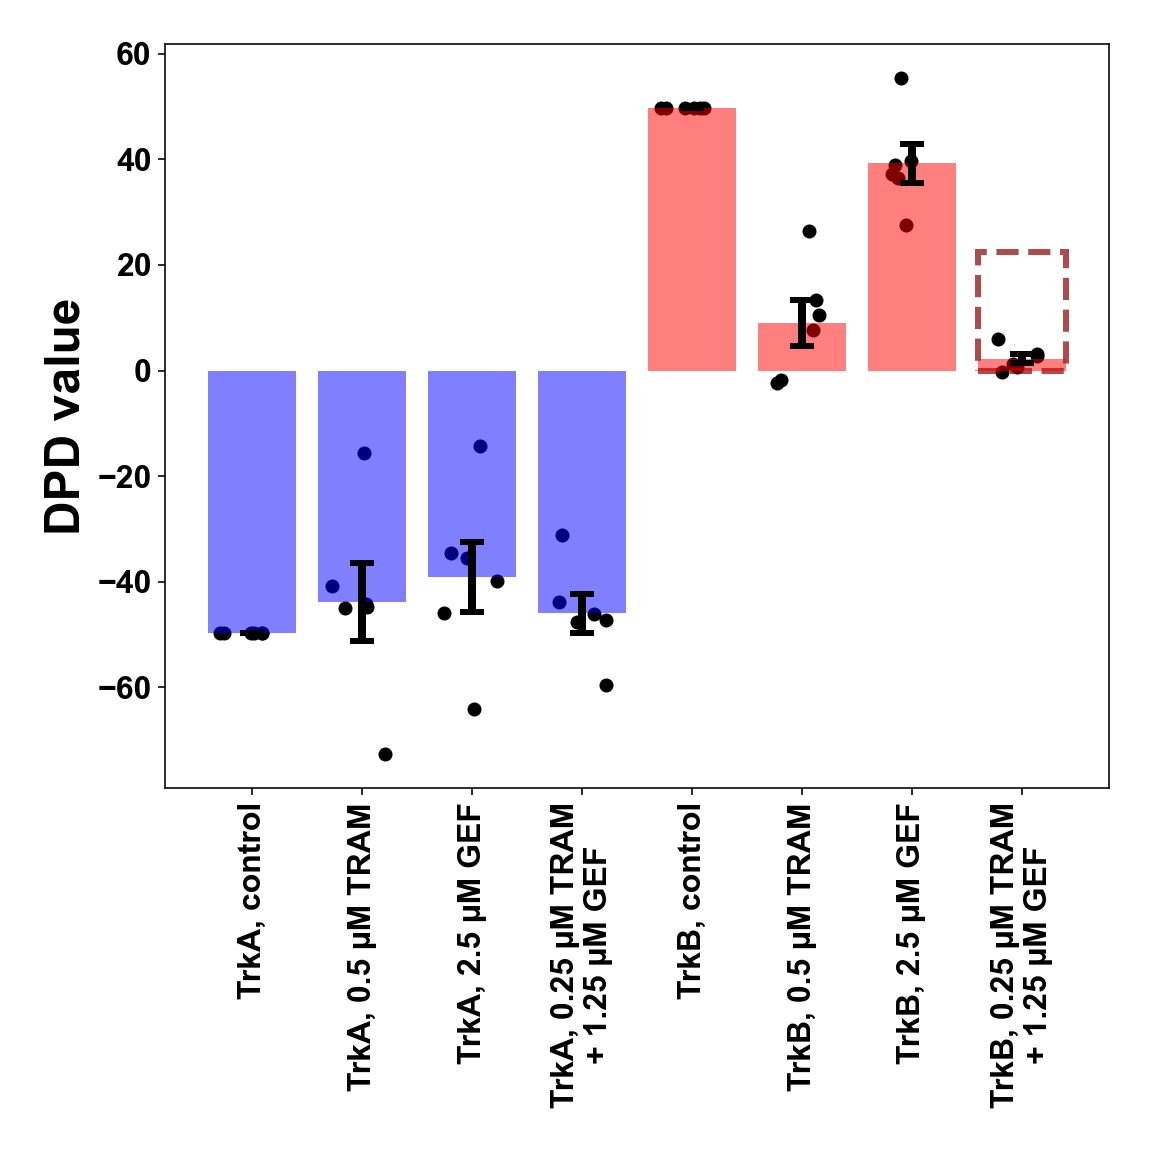

In [41]:
# plotting DPD values for 45 min with dots

TrkA_ctrl = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
TrkA_ctrl_err = stats.sem(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
TrkA_ctrl_arr = (list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_A2']))
TrkB_ctrl = statistics.mean(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))
TrkB_ctrl_err = stats.sem(list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))
TrkB_ctrl_arr = (list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_ctrls]['DPD_value_B2']))

TrkA_Tram = statistics.mean(list(MS_legend.loc[numbers_45_Tram]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_A2']))
TrkA_Tram_err = stats.sem(list(MS_legend.loc[numbers_45_Tram]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_A2']))
TrkA_Tram_arr = (list(MS_legend.loc[numbers_45_Tram]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_A2']))
TrkB_Tram = statistics.mean(list(MS_legend.loc[numbers_45_Tram]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_B2']))
TrkB_Tram_err = stats.sem(list(MS_legend.loc[numbers_45_Tram]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_B2']))
TrkB_Tram_arr = (list(MS_legend.loc[numbers_45_Tram]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Tram]['DPD_value_B2']))

TrkA_Gef = statistics.mean(list(MS_legend.loc[numbers_45_Gef]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_A2']))
TrkA_Gef_err = stats.sem(list(MS_legend.loc[numbers_45_Gef]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_A2']))
TrkA_Gef_arr = (list(MS_legend.loc[numbers_45_Gef]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_A2']))
TrkB_Gef = statistics.mean(list(MS_legend.loc[numbers_45_Gef]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_B2']))
TrkB_Gef_err = stats.sem(list(MS_legend.loc[numbers_45_Gef]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_B2']))
TrkB_Gef_arr = (list(MS_legend.loc[numbers_45_Gef]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Gef]['DPD_value_B2']))

TrkA_Comb = statistics.mean(list(MS_legend.loc[numbers_45_Comb]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_A2']))
TrkA_Comb_err = stats.sem(list(MS_legend.loc[numbers_45_Comb]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_A2']))
TrkA_Comb_arr = (list(MS_legend.loc[numbers_45_Comb]['DPD_value_A1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_A2']))
TrkB_Comb = statistics.mean(list(MS_legend.loc[numbers_45_Comb]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_B2']))
TrkB_Comb_err = stats.sem(list(MS_legend.loc[numbers_45_Comb]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_B2']))
TrkB_Comb_arr = (list(MS_legend.loc[numbers_45_Comb]['DPD_value_B1'])+list(MS_legend.loc[numbers_45_Comb]['DPD_value_B2']))

names = ['TrkA, control','TrkA, 0.5 µM TRAM','TrkA, 2.5 µM GEF','TrkA, 0.25 µM TRAM\n+ 1.25 µM GEF','TrkB, control','TrkB, 0.5 µM TRAM','TrkB, 2.5 µM GEF','TrkB, 0.25 µM TRAM\n+ 1.25 µM GEF']
values = [TrkA_ctrl,TrkA_Tram,TrkA_Gef,TrkA_Comb,TrkB_ctrl,TrkB_Tram,TrkB_Gef,TrkB_Comb]
errors = [TrkA_ctrl_err,TrkA_Tram_err,TrkA_Gef_err,TrkA_Comb_err,TrkB_ctrl_err,TrkB_Tram_err,TrkB_Gef_err,TrkB_Comb_err]
arrays = [TrkA_ctrl_arr,TrkA_Tram_arr,TrkA_Gef_arr,TrkA_Comb_arr,TrkB_ctrl_arr,TrkB_Tram_arr,TrkB_Gef_arr,TrkB_Comb_arr]

Y_Tram = (values[5] - DPD_A)/(DPD_B - DPD_A)
Y_Gef  = (values[6] - DPD_A)/(DPD_B - DPD_A)
Y_Comb = (values[7] - DPD_A)/(DPD_B - DPD_A)
Y_Comb_Bliss = np.sqrt(Y_Tram)*np.sqrt(Y_Gef)
value_comb_Bliss = Y_Comb_Bliss*(DPD_B - DPD_A) + DPD_A
print(Y_Comb_Bliss)
print(Y_Comb)
print(Y_Comb_Bliss - Y_Comb)

fig, ax = plt.subplots(figsize=(8,8))

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 24} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
plt.rc('font', **fontAxes)

#plt.title('Phenotypic effect of kinase inhibitors on TrkA and TrkB cells',**fontTitle)
ax.set_ylabel('DPD value',**fontLabel)

ind = np.arange(len(names))
width=0.6

ax.bar(7,value_comb_Bliss,fill=False,edgecolor='darkred',linewidth=3,linestyle='dashed',alpha=0.7)
ax.bar(names,values,yerr=errors,color=['blue','blue','blue','blue','red','red','red','red'],error_kw=dict(lw=4, capsize=6, capthick=3),alpha=0.5)

for i in range(len(ind)):
    ax.scatter(ind[i] + np.random.random(len(arrays[i])) * 0.9*width - 0.5*width,arrays[i],color='black')


plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()